# Trabajo Práctico 1 - Ejercicio 2 - Modelos de Clasificación Binaria
## <center> Grupo 07 </center>
### <center> Integrantes: </center>
<center>

Leandro Elias Brizuela

José Rafael Patty Morales

Jesabel Pugliese

Candela Matelica
</center>


# Inicialización del entorno

In [1]:
# Manipulación de datos y funciones matemáticas
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as psp
from IPython.display import display
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Modelos y métricas
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
import shap

# Balanceo de datos
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Guardar modelos
import joblib

# Importación de datos

In [2]:
!gdown 1cB67Ob4CQXVpka8kiYmmUE2lbO5pChEG
!gdown 1CZ4o-pUpZ0aYCVnSJ9glisgKNOuGvRxu

# Datos filtrados
!gdown 1nMSnnv5KHG6bUW3qco14KgOu9fq1tNUa

# Datos procesados
!gdown 1Bfiy8Qp3scYOdDwjpGGifdffwrmA06hh


Downloading...
From: https://drive.google.com/uc?id=1cB67Ob4CQXVpka8kiYmmUE2lbO5pChEG
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 162MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CZ4o-pUpZ0aYCVnSJ9glisgKNOuGvRxu
To: /content/aus_coordinates.csv
100% 2.55k/2.55k [00:00<00:00, 8.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nMSnnv5KHG6bUW3qco14KgOu9fq1tNUa
To: /content/datos_filtrados.csv
100% 7.79M/7.79M [00:00<00:00, 39.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bfiy8Qp3scYOdDwjpGGifdffwrmA06hh
To: /content/datos_procesados.csv
100% 42.8M/42.8M [00:00<00:00, 110MB/s]


In [3]:
lluvia = pd.read_csv('/content/weatherAUS.csv')
coordenadas = pd.read_csv('/content/aus_coordinates.csv')


In [4]:
localizacion_filtradas = coordenadas[(coordenadas["Region"]== "Nueva Gales del Sur") | (coordenadas["Region"]== "Victoria")]["Location"].tolist()

In [5]:
localizacion_filtradas

['Albury',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Penrith',
 'Portland',
 'Richmond',
 'Sale',
 'Sydney',
 'SydneyAirport',
 'WaggaWagga',
 'Watsonia',
 'Williamtown',
 'Wollongong']

In [6]:
lluvia = lluvia[lluvia['Location'].isin(localizacion_filtradas)]

# Exploración de datos

In [ ]:
print("Cantidad de filas: " + str(lluvia.shape[0]))
print("Cantidad de columnas: " + str(lluvia.shape[1]))

Cantidad de filas: 74492
Cantidad de columnas: 23


In [ ]:
# Vemos las primeras 5 filas y las ultimas 5:

pd.concat([lluvia.head(5), lluvia.tail(5)])

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
84002,2017-06-21,Dartmoor,8.9,13.1,0.8,NaN,NaN,SSE,26.0,SW,...,99.0,89.0,1029.0,1028.3,NaN,NaN,10.2,11.3,No,No
84003,2017-06-22,Dartmoor,7.5,15.1,0.0,NaN,NaN,NW,26.0,ENE,...,97.0,72.0,1026.8,1022.9,NaN,NaN,8.9,14.8,No,No
84004,2017-06-23,Dartmoor,5.6,14.2,0.0,NaN,NaN,NNW,26.0,N,...,86.0,87.0,1016.7,1014.2,NaN,NaN,7.3,12.6,No,Yes
84005,2017-06-24,Dartmoor,6.2,11.8,3.0,NaN,NaN,W,20.0,NW,...,96.0,70.0,1019.8,1017.8,NaN,NaN,6.9,10.9,Yes,No
84006,2017-06-25,Dartmoor,5.9,13.4,0.2,NaN,NaN,NW,31.0,NNW,...,98.0,89.0,1016.4,1015.6,NaN,NaN,8.6,12.3,No,Yes


In [ ]:
# Vemos la cantidad de valores NO nulos:

print(lluvia.count())

Date             74492
Location         74492
MinTemp          73401
MaxTemp          73551
Rainfall         72369
Evaporation      42528
Sunshine         35954
WindGustDir      68945
WindGustSpeed    68951
WindDir9am       68206
WindDir3pm       72062
WindSpeed9am     73517
WindSpeed3pm     72893
Humidity9am      72949
Humidity3pm      72355
Pressure9am      67118
Pressure3pm      67163
Cloud9am         48166
Cloud3pm         47334
Temp9am          73390
Temp3pm          72781
RainToday        72369
RainTomorrow     72371
dtype: int64


In [ ]:
# Vemos la cantidad de valores nulos:

print(lluvia.isna().sum())

Date                 0
Location             0
MinTemp           1091
MaxTemp            941
Rainfall          2123
Evaporation      31964
Sunshine         38538
WindGustDir       5547
WindGustSpeed     5541
WindDir9am        6286
WindDir3pm        2430
WindSpeed9am       975
WindSpeed3pm      1599
Humidity9am       1543
Humidity3pm       2137
Pressure9am       7374
Pressure3pm       7329
Cloud9am         26326
Cloud3pm         27158
Temp9am           1102
Temp3pm           1711
RainToday         2123
RainTomorrow      2121
dtype: int64


In [ ]:
# Vemos el porcentaje de valores nulos de cada variable

filas_totales = lluvia.shape[0]
print((lluvia.isna().sum() * 100 / filas_totales).round(2))

Date              0.00
Location          0.00
MinTemp           1.46
MaxTemp           1.26
Rainfall          2.85
Evaporation      42.91
Sunshine         51.73
WindGustDir       7.45
WindGustSpeed     7.44
WindDir9am        8.44
WindDir3pm        3.26
WindSpeed9am      1.31
WindSpeed3pm      2.15
Humidity9am       2.07
Humidity3pm       2.87
Pressure9am       9.90
Pressure3pm       9.84
Cloud9am         35.34
Cloud3pm         36.46
Temp9am           1.48
Temp3pm           2.30
RainToday         2.85
RainTomorrow      2.85
dtype: float64


In [ ]:
# Vemos los tipos de variable.

lluvia.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
lluvia.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,73401.000000,73551.000000,72369.000000,42528.000000,35954.000000,68951.000000,73517.000000,72893.000000,72949.000000,72355.000000,67118.000000,67163.000000,48166.000000,47334.000000,73390.000000,72781.000000
mean,11.757881,22.543714,2.335903,5.036990,7.146985,40.142870,14.059809,18.716214,71.795638,52.911423,1018.173842,1015.938791,4.710543,4.785271,16.127699,21.052599
std,5.746111,6.553097,8.127033,4.056227,3.879089,14.311925,9.352097,9.375796,17.877189,20.545659,7.162155,7.054910,2.888130,2.675554,5.661870,6.369763
min,-5.600000,4.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-1.000000,1.700000
25%,7.500000,17.700000,0.000000,2.400000,4.100000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.400000,1011.200000,1.000000,2.000000,11.900000,16.400000
50%,11.700000,21.900000,0.000000,4.000000,7.800000,39.000000,13.000000,19.000000,73.000000,53.000000,1018.300000,1016.100000,6.000000,6.000000,16.100000,20.400000
75%,16.200000,26.700000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.700000,7.000000,7.000000,20.400000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.800000,9.000000,8.000000,37.700000,46.700000


### Graficos exploratios de frecuencia de las distintas variables

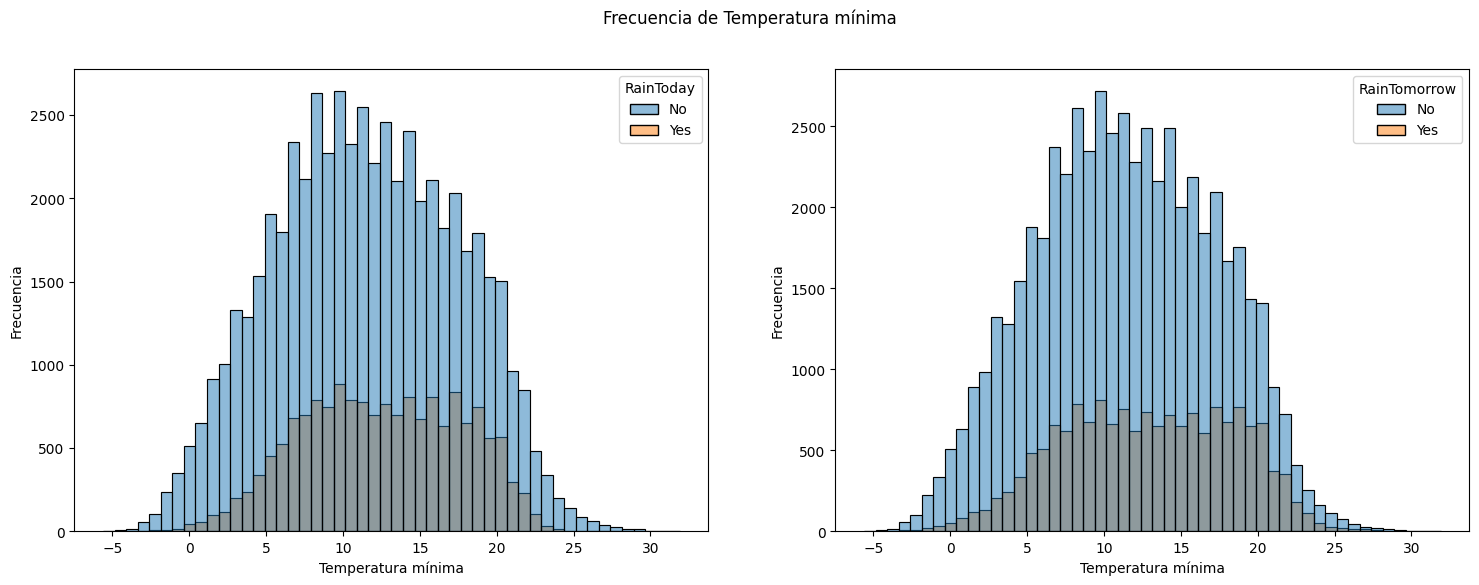

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))

sns.histplot(lluvia, x ='MinTemp', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Temperatura mínima")
axes[0].set_ylabel("Frecuencia")

sns.histplot(lluvia, x ='MinTemp', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Temperatura mínima")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de Temperatura mínima")

plt.show()

*Nota*: Se puede observar que las lluvias son mas frecuentes cuando la temperatura mínima es ligeramente calida.

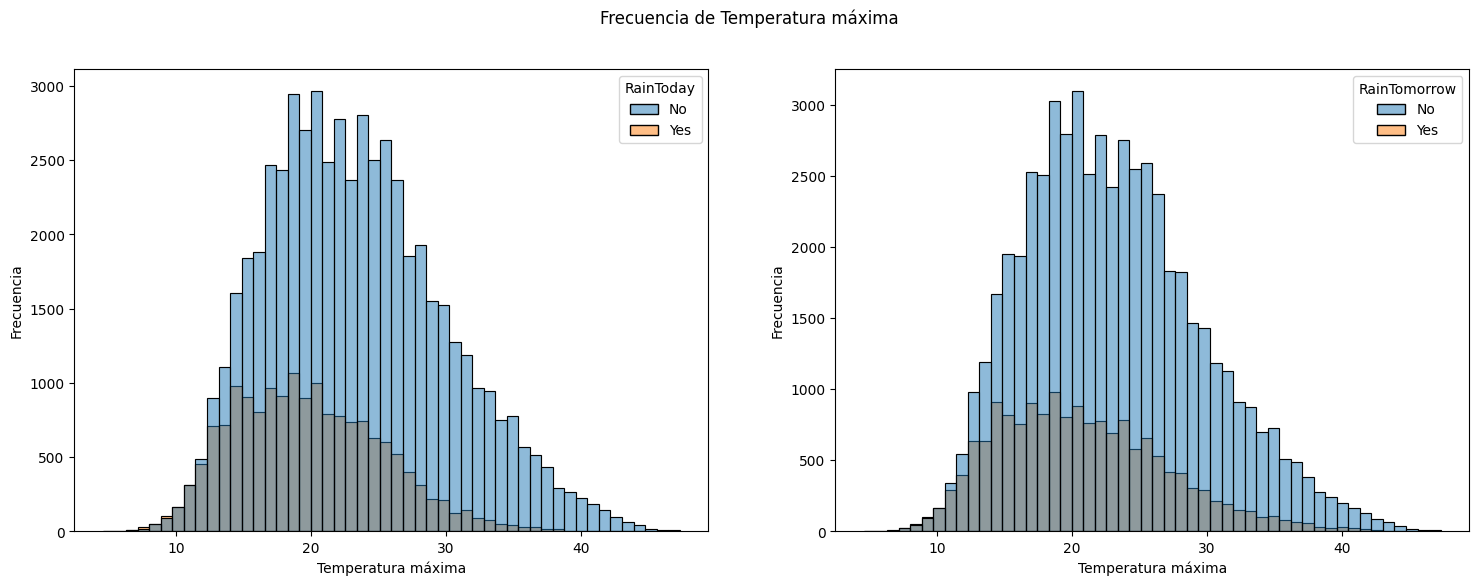

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))

sns.histplot(lluvia, x ='MaxTemp', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Temperatura máxima")
axes[0].set_ylabel("Frecuencia")

sns.histplot(lluvia, x ='MaxTemp', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Temperatura máxima")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de Temperatura máxima")

plt.show()

*Nota:* Se puede observar que las lluvias no suelen tener una temperatura máxima alta, mas bien tienden a una distribución normal corrida hacia la izquierda.

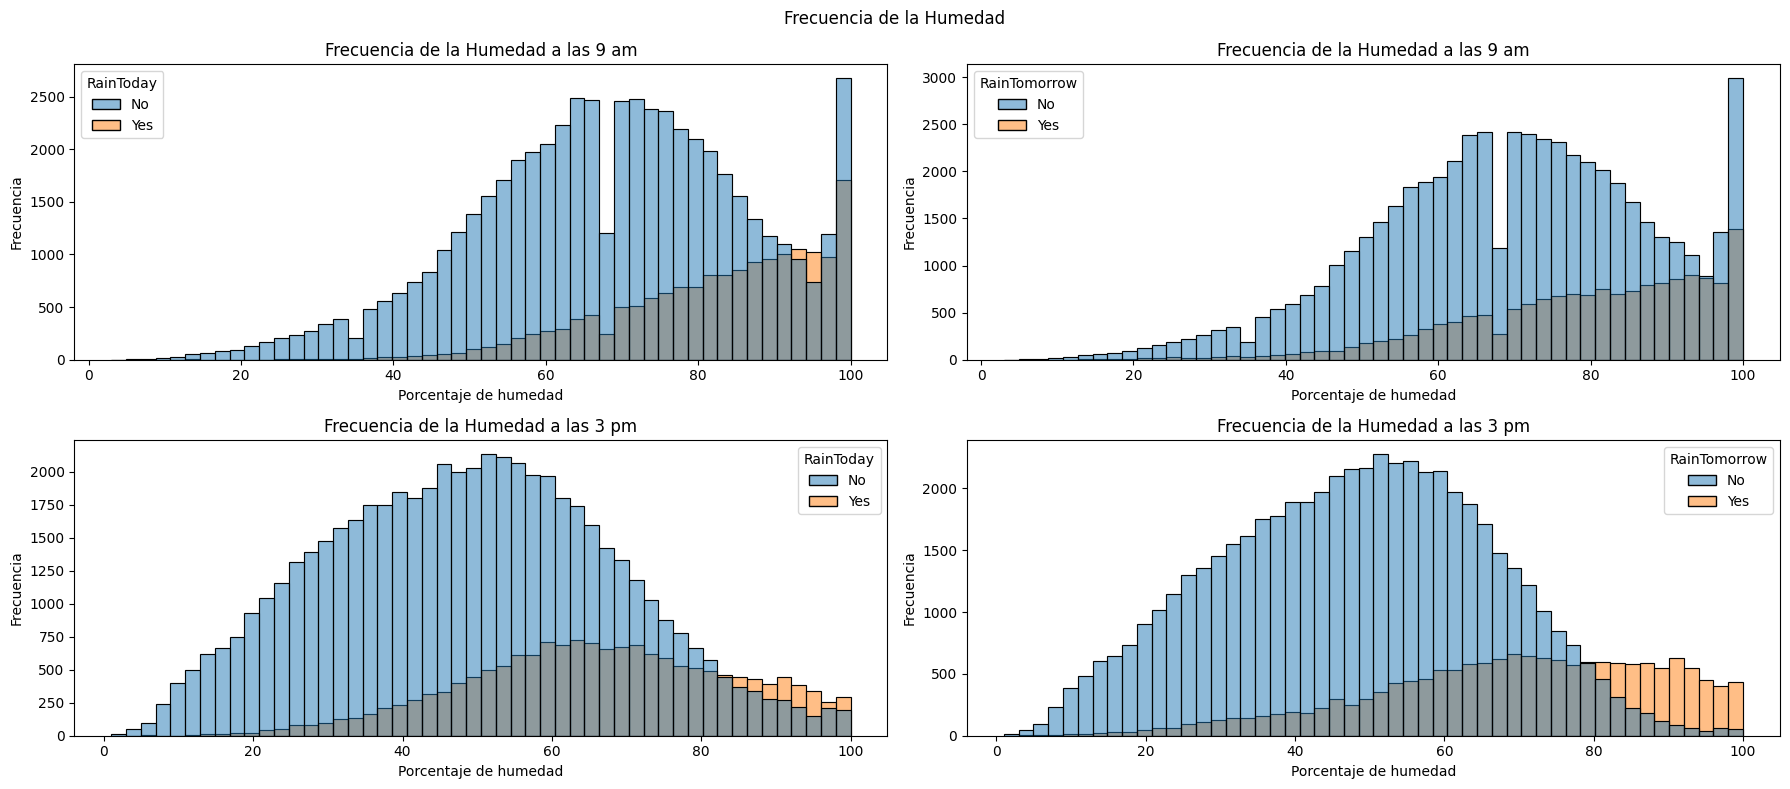

In [ ]:
fig,axes = plt.subplots(2 , 2, figsize = (18, 8))
axes = axes.flatten()

sns.histplot(lluvia, x ='Humidity9am', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Porcentaje de humedad")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Frecuencia de la Humedad a las 9 am")


sns.histplot(lluvia, x ='Humidity9am', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Porcentaje de humedad")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Frecuencia de la Humedad a las 9 am")


sns.histplot(lluvia, x ='Humidity3pm', bins = 50, hue = 'RainToday', ax = axes[2])
axes[2].set_xlabel("Porcentaje de humedad")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Frecuencia de la Humedad a las 3 pm")

sns.histplot(lluvia, x ='Humidity3pm', bins = 50, hue = 'RainTomorrow', ax = axes[3])
axes[3].set_xlabel("Porcentaje de humedad")
axes[3].set_ylabel("Frecuencia")
axes[3].set_title("Frecuencia de la Humedad a las 3 pm")


plt.suptitle("Frecuencia de la Humedad")

plt.tight_layout()
plt.show()

*Nota:* Se puede observar que los días de lluvia presentan niveles de humedad significativamente más altos tanto en la mañana como en la tarde.
Además, la humedad a las 3 pm puede ser una variable crucial al momento de predecir si lloverá la día siguiente, ya que sobresale al final del gráfico.

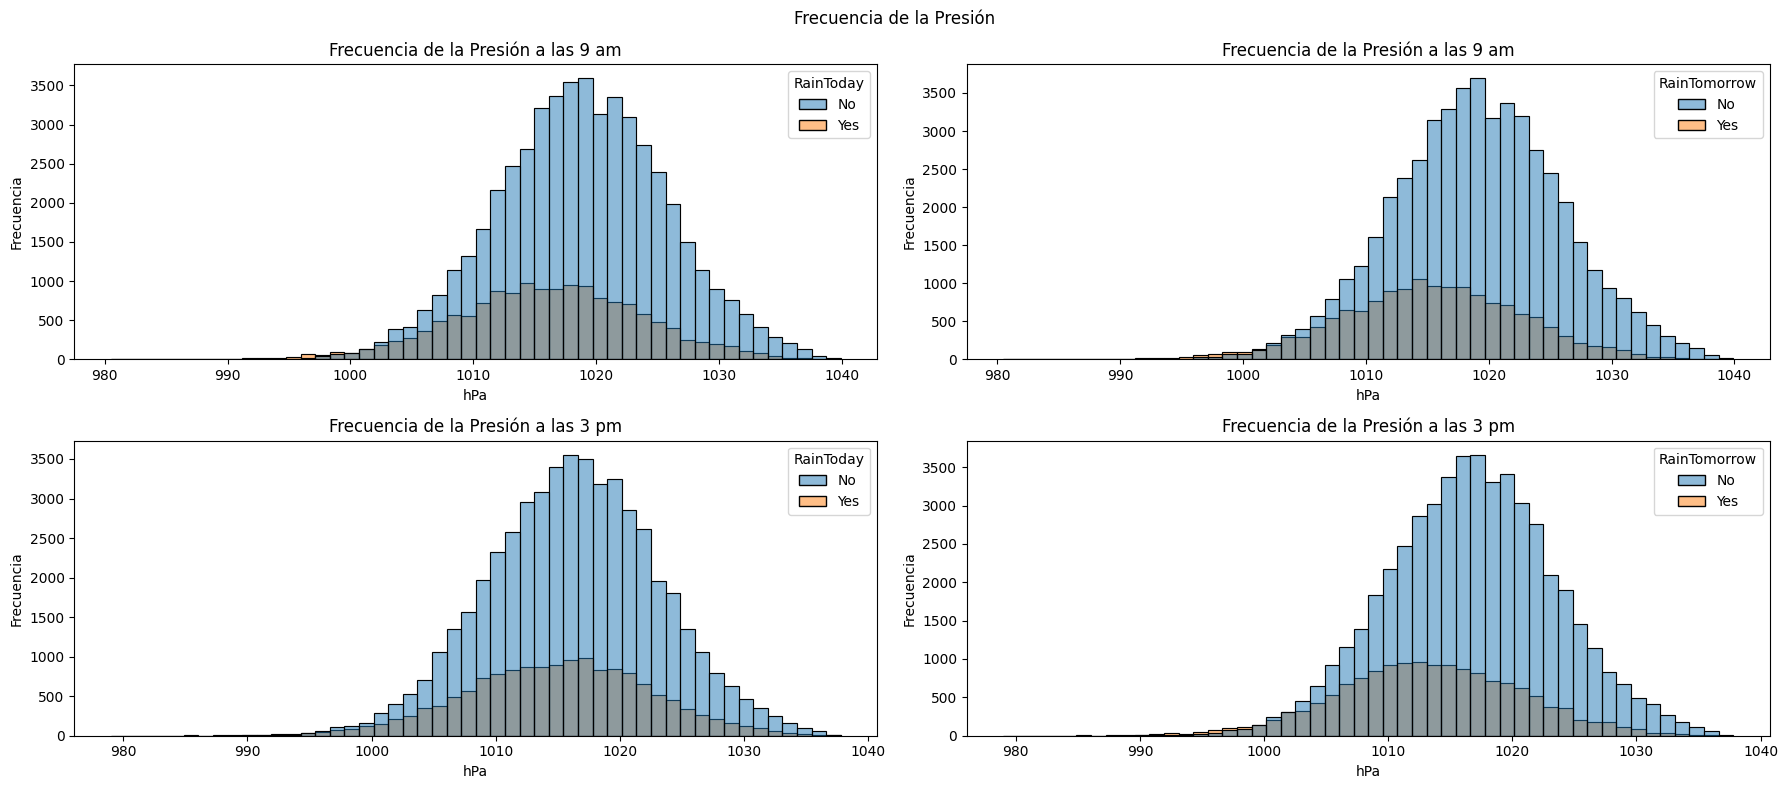

In [ ]:
fig,axes = plt.subplots(2 , 2, figsize = (18, 8))
axes = axes.flatten()

sns.histplot(lluvia, x ='Pressure9am', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("hPa")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Frecuencia de la Presión a las 9 am")


sns.histplot(lluvia, x ='Pressure9am', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("hPa")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Frecuencia de la Presión a las 9 am")


sns.histplot(lluvia, x ='Pressure3pm', bins = 50, hue = 'RainToday', ax = axes[2])
axes[2].set_xlabel("hPa")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Frecuencia de la Presión a las 3 pm")

sns.histplot(lluvia, x ='Pressure3pm', bins = 50, hue = 'RainTomorrow', ax = axes[3])
axes[3].set_xlabel("hPa")
axes[3].set_ylabel("Frecuencia")
axes[3].set_title("Frecuencia de la Presión a las 3 pm")

plt.suptitle("Frecuencia de la Presión")

plt.tight_layout()
plt.show()

*Nota*: Se puede observar que los días de lluvia están asociados a presiones bajas, ya que son un poco más frecuentes a menores niveles de presión..

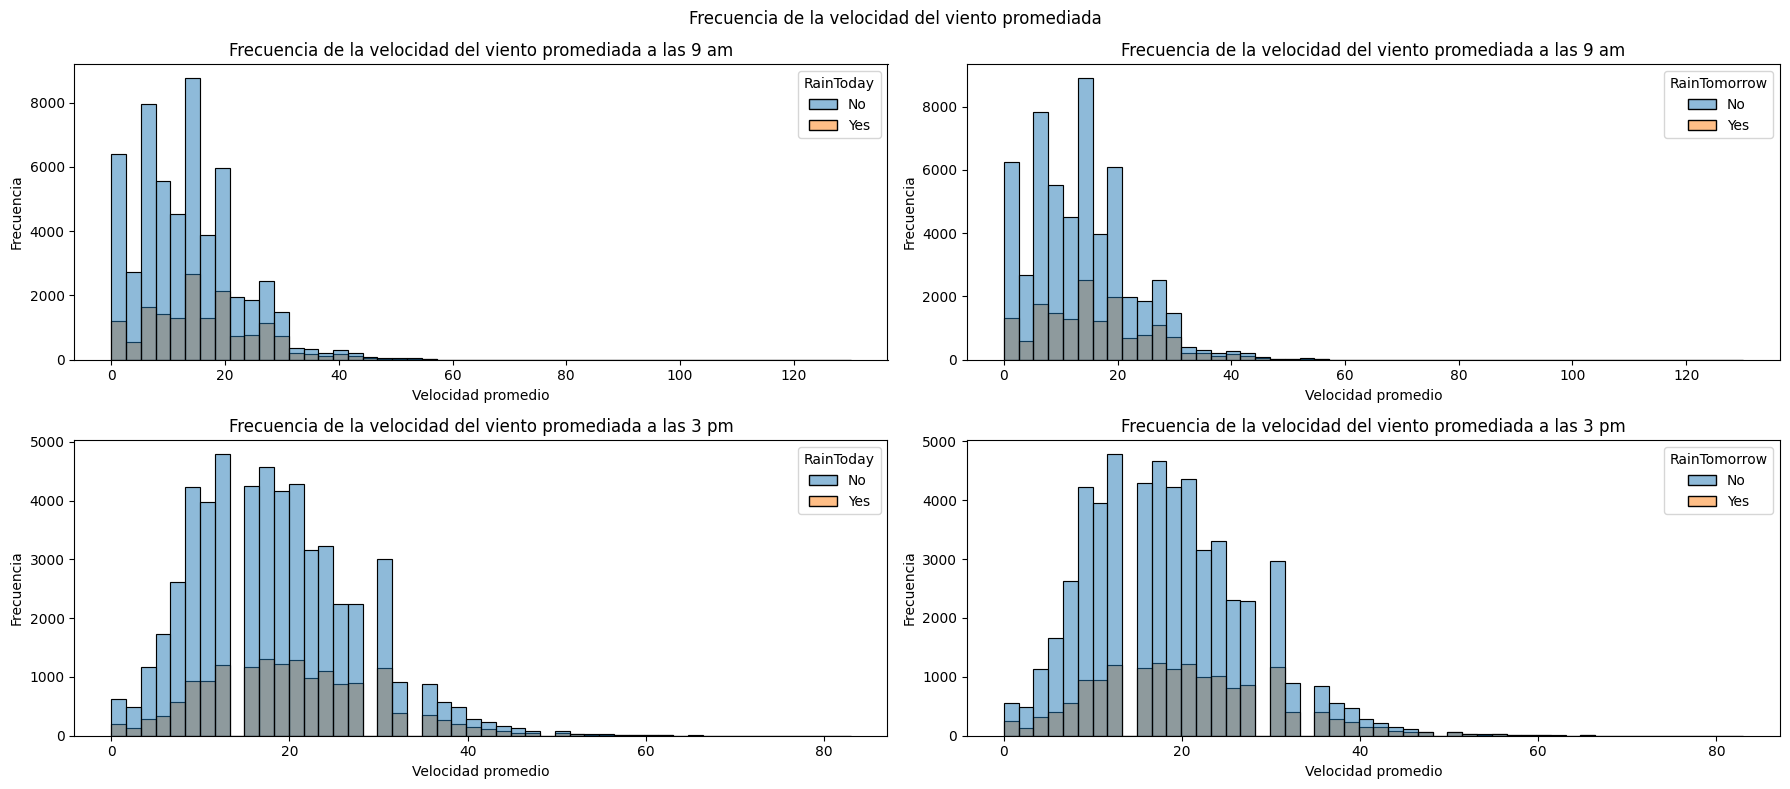

In [ ]:
fig,axes = plt.subplots(2 , 2, figsize = (18, 8))
axes = axes.flatten()

sns.histplot(lluvia, x ='WindSpeed9am', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Velocidad promedio")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Frecuencia de la velocidad del viento promediada a las 9 am")

sns.histplot(lluvia, x ='WindSpeed9am', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Velocidad promedio")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Frecuencia de la velocidad del viento promediada a las 9 am")

sns.histplot(lluvia, x ='WindSpeed3pm', bins = 50, hue = 'RainToday', ax = axes[2])
axes[2].set_xlabel("Velocidad promedio")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Frecuencia de la velocidad del viento promediada a las 3 pm")

sns.histplot(lluvia, x ='WindSpeed3pm', bins = 50, hue = 'RainTomorrow', ax = axes[3])
axes[3].set_xlabel("Velocidad promedio")
axes[3].set_ylabel("Frecuencia")
axes[3].set_title("Frecuencia de la velocidad del viento promediada a las 3 pm")

plt.suptitle("Frecuencia de la velocidad del viento promediada")

plt.tight_layout()
plt.show()

*Nota:* Se puede observar, que a menor velocidad del viento, menor es la frecuencia de lluvia y que a medida que aumenta tambien amunenta su frecuencia.

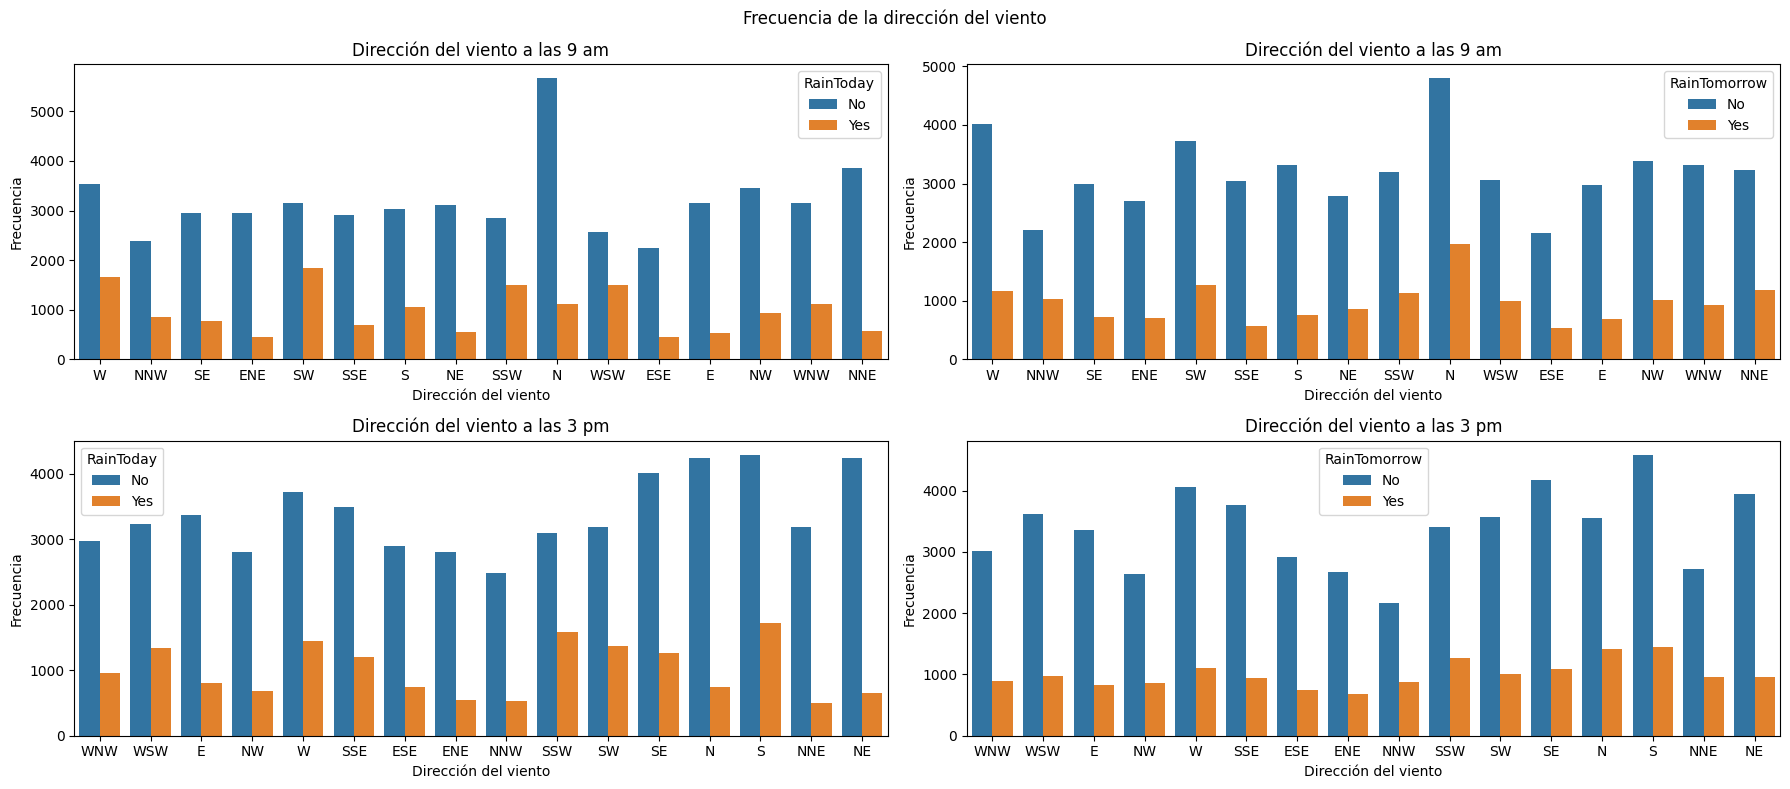

In [ ]:
fig,axes = plt.subplots(2 , 2, figsize = (18, 8))
axes = axes.flatten()

sns.countplot(lluvia, x = 'WindDir9am', ax = axes[0],hue = 'RainToday')
axes[0].set_xlabel("Dirección del viento")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Dirección del viento a las 9 am")

sns.countplot(lluvia, x = 'WindDir9am', ax = axes[1],hue = 'RainTomorrow')
axes[1].set_xlabel("Dirección del viento")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Dirección del viento a las 9 am")

sns.countplot(lluvia, x = 'WindDir3pm', ax = axes[2],hue = 'RainToday')
axes[2].set_xlabel("Dirección del viento")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Dirección del viento a las 3 pm")

sns.countplot(lluvia, x = 'WindDir3pm', ax = axes[3],hue = 'RainTomorrow')
axes[3].set_xlabel("Dirección del viento")
axes[3].set_ylabel("Frecuencia")
axes[3].set_title("Dirección del viento a las 3 pm")

plt.suptitle("Frecuencia de la dirección del viento")

plt.tight_layout()
plt.show()

*Nota:* Se puede observar, que los días con lluvia son menos frecuentes que los días sin lluvia en todas las direcciones.

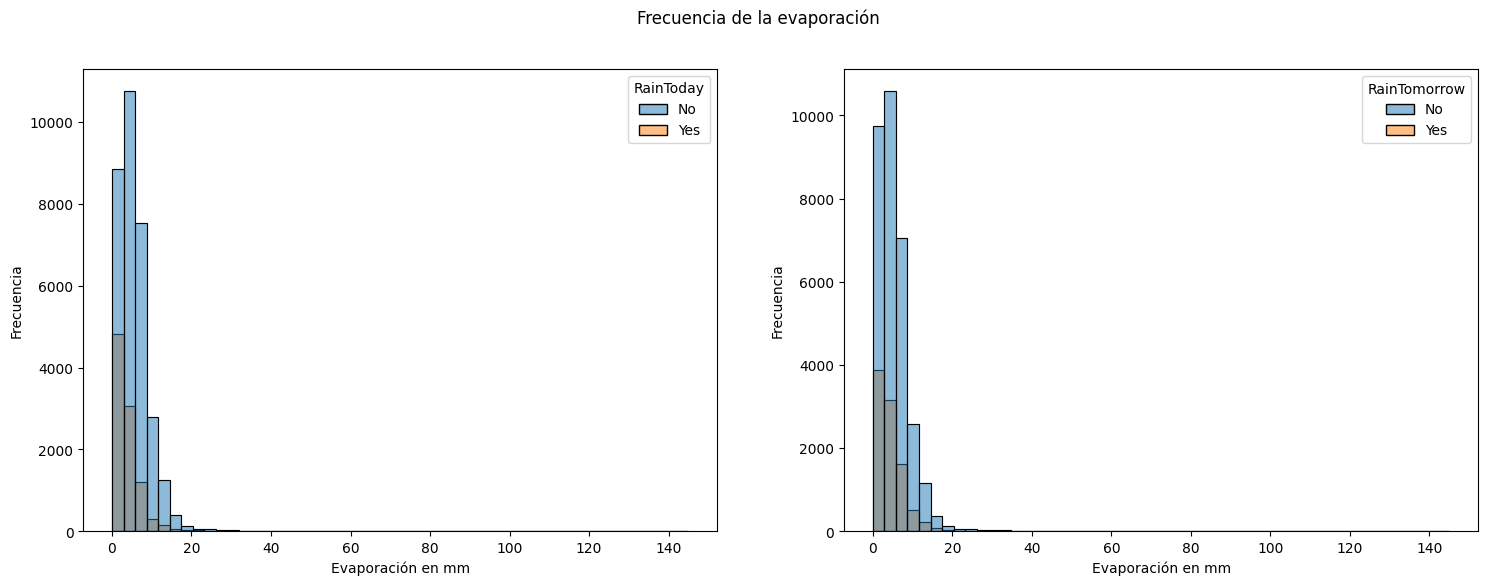

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))
axes = axes.flatten()

sns.histplot(lluvia, x ='Evaporation', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Evaporación en mm")
axes[0].set_ylabel("Frecuencia")

sns.histplot(lluvia, x ='Evaporation', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Evaporación en mm")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de la evaporación")

plt.show()

*Nota:* Los días son mas frecuentes cuando la evaporación esta cercana a $0$.

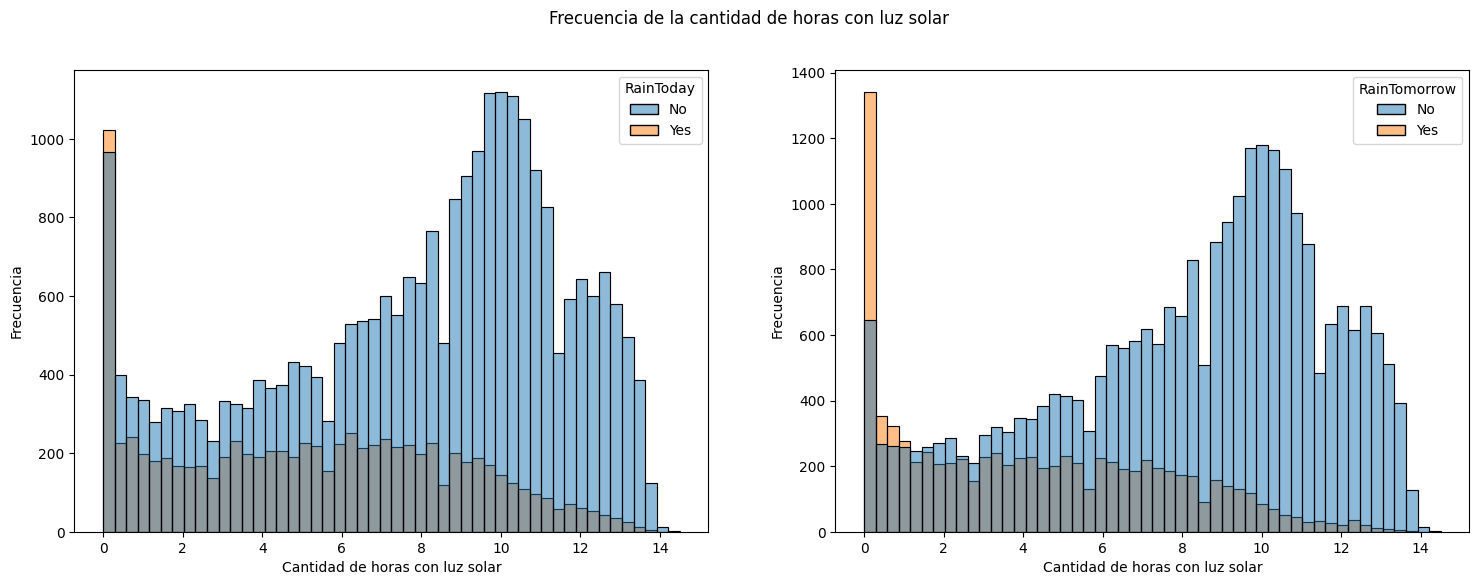

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))

sns.histplot(lluvia, x ='Sunshine', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Cantidad de horas con luz solar")
axes[0].set_ylabel("Frecuencia")

sns.histplot(lluvia, x ='Sunshine', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Cantidad de horas con luz solar")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de la cantidad de horas con luz solar")

plt.show()

*Nota:* Se puede observar, que los días con lluvia tenemos menos horas de luz solar, lo cual tiene sentido eteorológico.

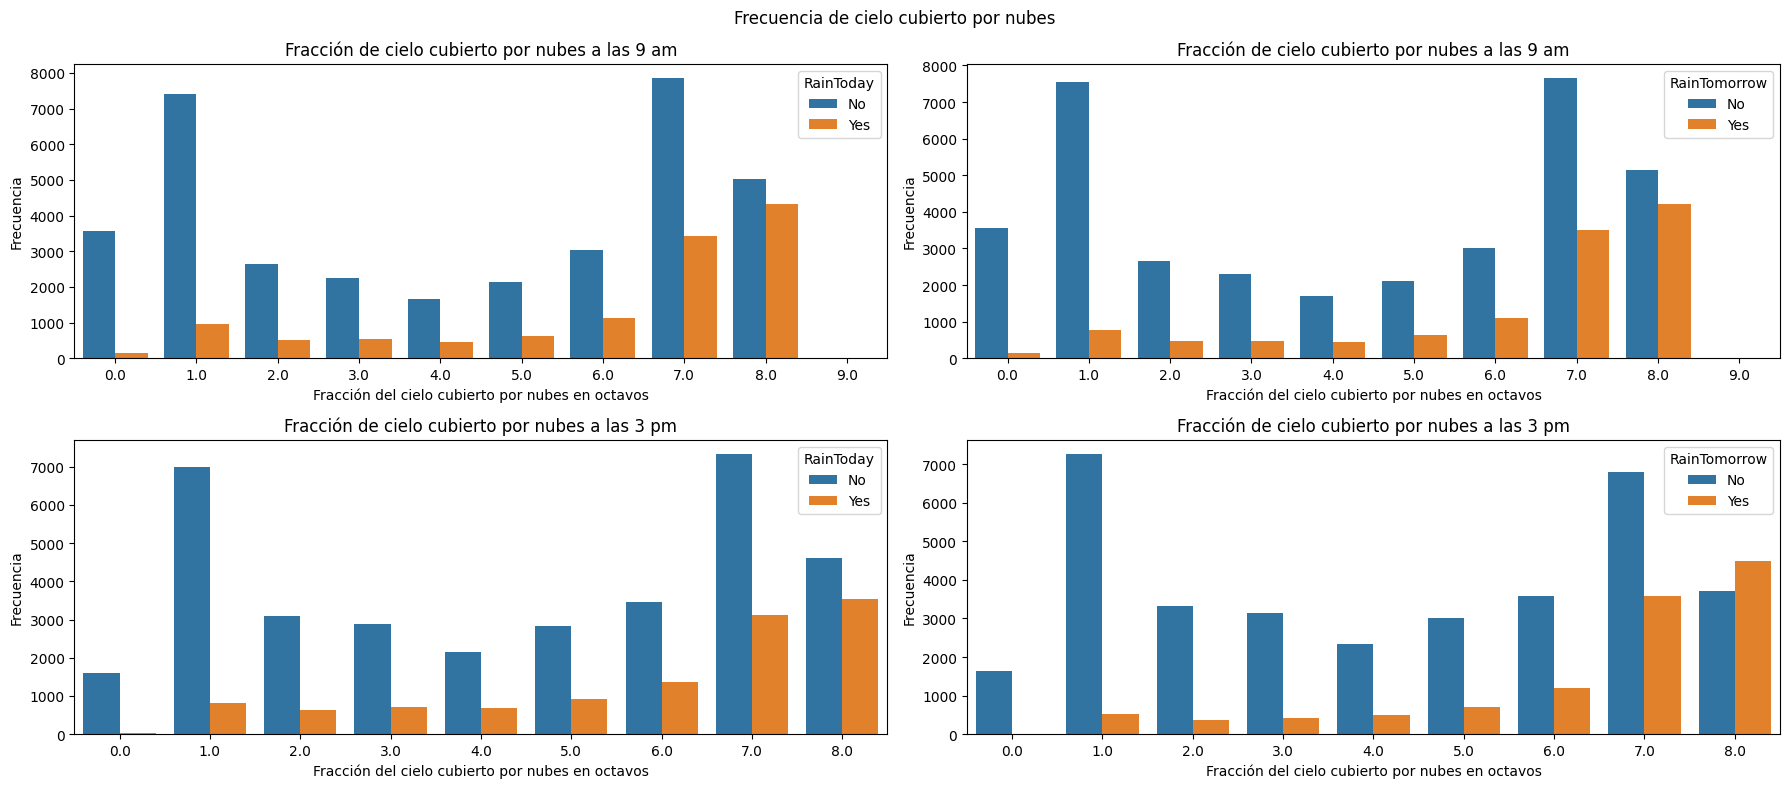

In [ ]:
fig,axes = plt.subplots(2 , 2, figsize = (18, 8))
axes = axes.flatten()

sns.countplot(lluvia, x = 'Cloud9am', ax = axes[0],hue = 'RainToday')
axes[0].set_xlabel("Fracción del cielo cubierto por nubes en octavos")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Fracción de cielo cubierto por nubes a las 9 am")

sns.countplot(lluvia, x = 'Cloud9am', ax = axes[1],hue = 'RainTomorrow')
axes[1].set_xlabel("Fracción del cielo cubierto por nubes en octavos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Fracción de cielo cubierto por nubes a las 9 am")

sns.countplot(lluvia, x = 'Cloud3pm', ax = axes[2],hue = 'RainToday')
axes[2].set_xlabel("Fracción del cielo cubierto por nubes en octavos")
axes[2].set_ylabel("Frecuencia")
axes[2].set_title("Fracción de cielo cubierto por nubes a las 3 pm")

sns.countplot(lluvia, x = 'Cloud3pm', ax = axes[3],hue = 'RainTomorrow')
axes[3].set_xlabel("Fracción del cielo cubierto por nubes en octavos")
axes[3].set_ylabel("Frecuencia")
axes[3].set_title("Fracción de cielo cubierto por nubes a las 3 pm")

plt.suptitle("Frecuencia de cielo cubierto por nubes")

plt.tight_layout()
plt.show()

*Nota:* Se puede observar que a mayor cantidad de nubes, mayores son los días que lluven, lo cual tiene sentido metereológico.

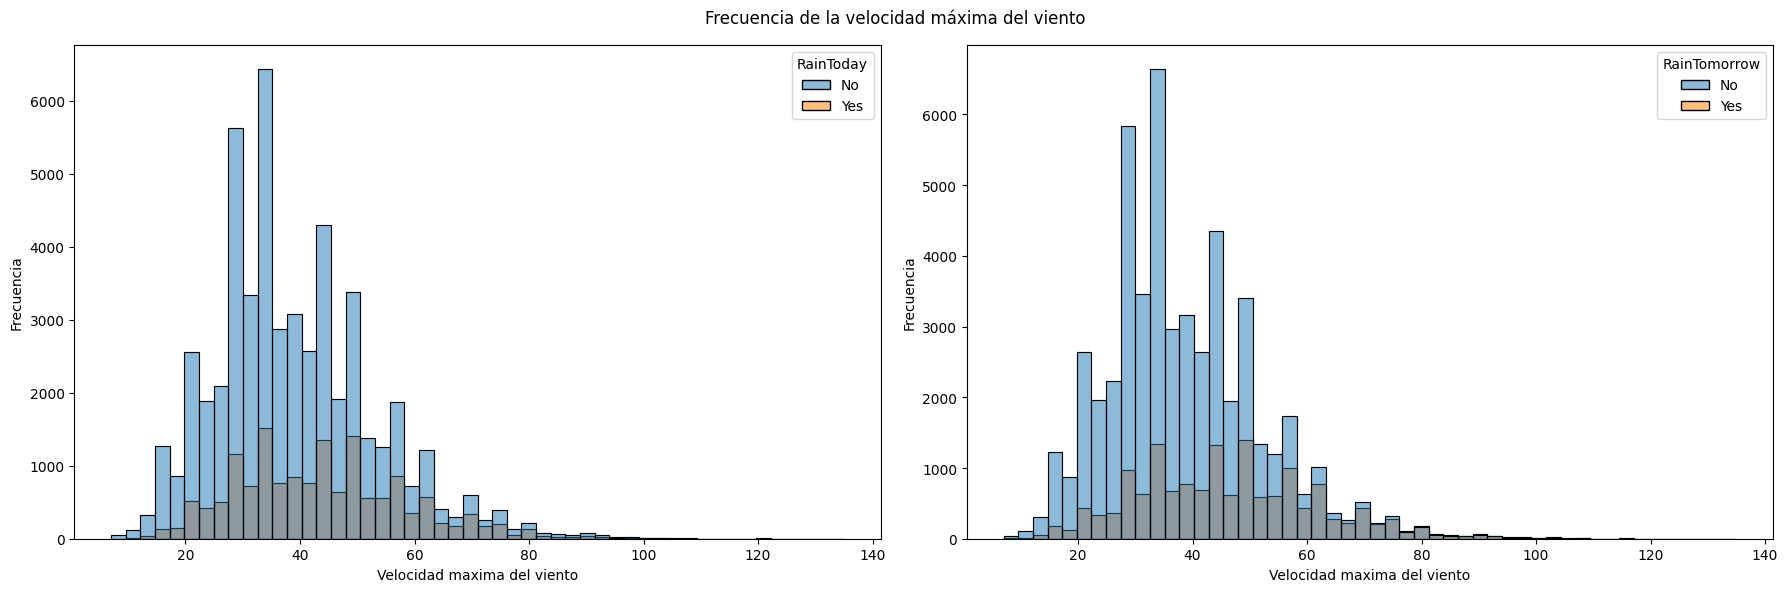

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))

sns.histplot(lluvia, x ='WindGustSpeed', bins = 50, hue = 'RainToday', ax = axes[0])
axes[0].set_xlabel("Velocidad maxima del viento")
axes[0].set_ylabel("Frecuencia")

sns.histplot(lluvia, x ='WindGustSpeed', bins = 50, hue = 'RainTomorrow', ax = axes[1])
axes[1].set_xlabel("Velocidad maxima del viento")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de la velocidad máxima del viento")

plt.tight_layout()
plt.show()

*Nota:* Se pude observar, que los dias con lluvia tienden a tener mayores velocidades máximas del viento.

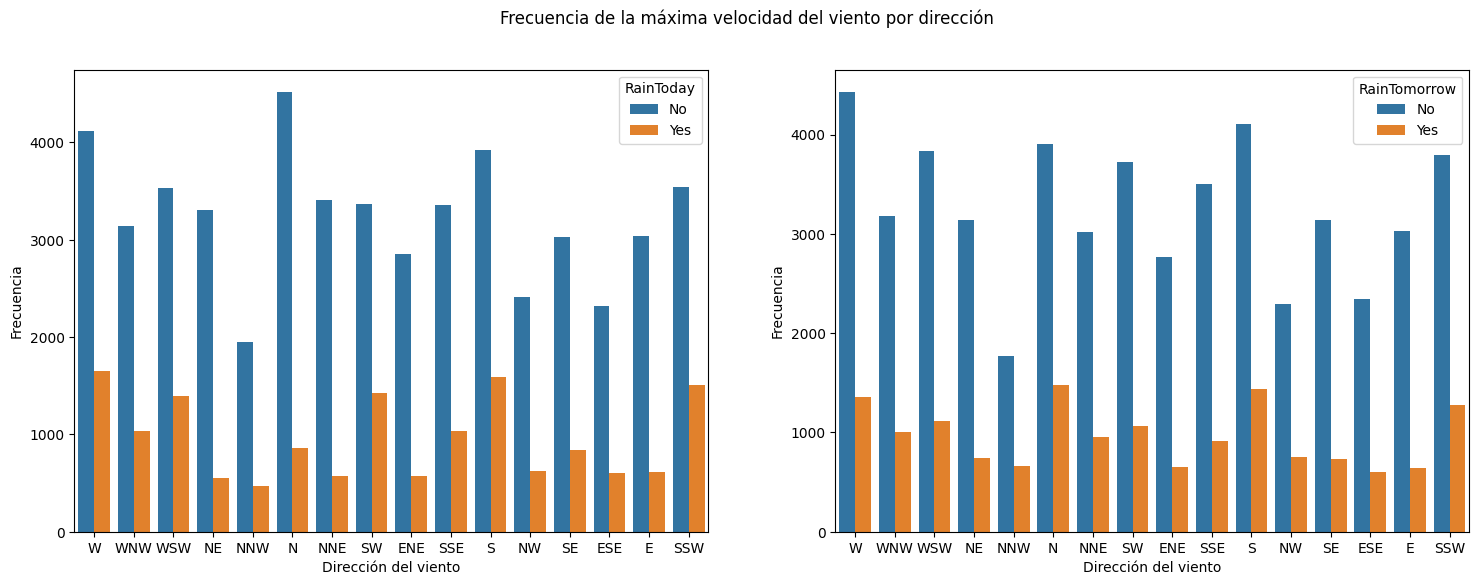

In [ ]:
fig,axes = plt.subplots(1 , 2, figsize = (18, 6))
axes = axes.flatten()

sns.countplot(lluvia, x = 'WindGustDir', ax = axes[0],hue = 'RainToday')
axes[0].set_xlabel("Dirección del viento")
axes[0].set_ylabel("Frecuencia")

sns.countplot(lluvia, x = 'WindGustDir', ax = axes[1],hue = 'RainTomorrow')
axes[1].set_xlabel("Dirección del viento")
axes[1].set_ylabel("Frecuencia")

plt.suptitle("Frecuencia de la máxima velocidad del viento por dirección ")

plt.show()

*Nota:* Se puede observar que las velocidades máximas de viento proveniente de W, SW, S y SSW son las direcciones más frecuentes cuando llueve.

# Limpieza de datos

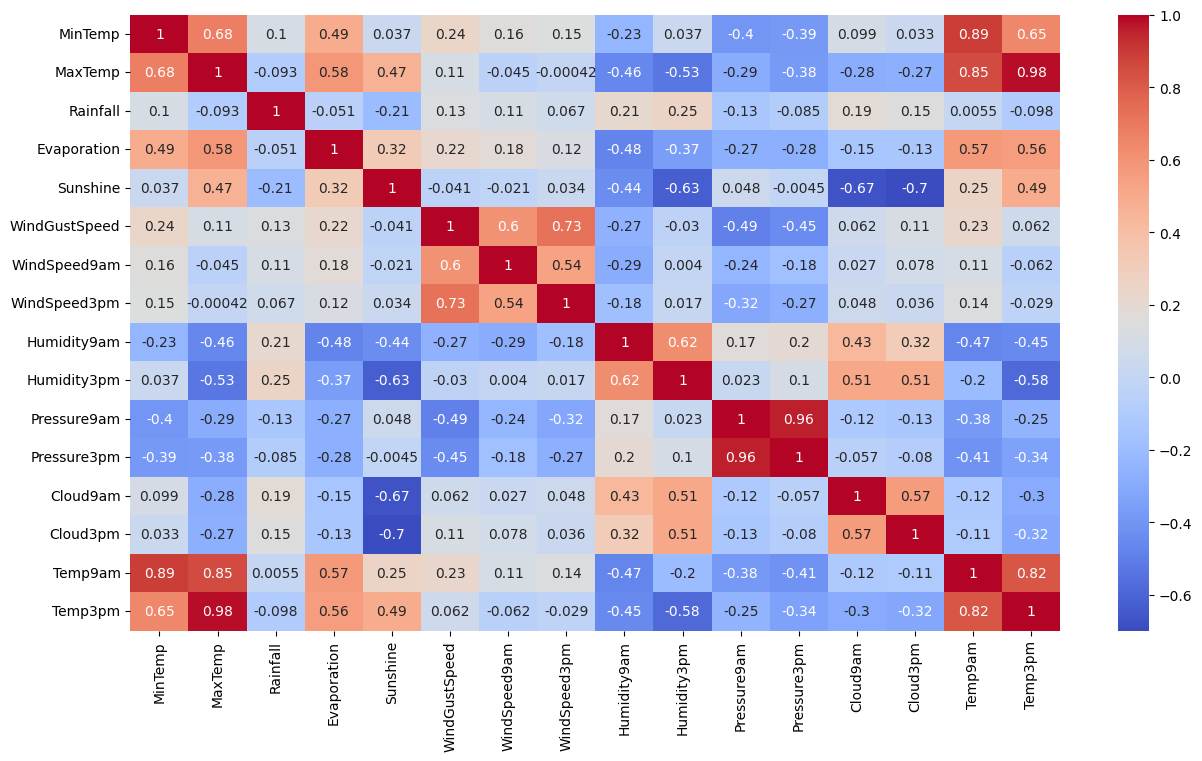

In [ ]:
matriz_correlacion = lluvia.corr(numeric_only=True)
plt.figure(figsize = (15, 8))
sns.heatmap(matriz_correlacion, annot = True, cmap = 'coolwarm')
plt.show()

Podemos ver una fuerte correlación de variables entre
- `Temp3pm` y `MaxTemp` con un resultado de $0.98$
- `Temp3pm` y `Temp9am` con un resultado de $0.82$
- `Temp9am` y `MinTamp` con un resultado de $0.89$
- `Temp9am` y `MaxTemp` con un resultado de $0.85$
- `Pressure3pm` y `Pressure9am` con un resultado de $0.96$
- `WindSpeed3pm` y `WindGustSpeed` con un resultado de $0.73$

Muchas de estas correlaciones son esperables, ya que provienen de la misma característica medida en diferentes horarios o bien, sus máximos o mínimos.

Entre las correlaciones negativas  destacables tenemos:
- `Sunshine` y `Humidity3pm` con un resultado de $-0.63$
- `Sunshine` y `Cloud3pm`  con un resultado de $- 0.70$
- `Evaporation` y `Humidity9am` con un resultado de $-0.48$

En general, se observa que una mayor presencia del sol, disminuye la cantidad de nubes como la humedad. Además, a mayor evaporación menor humedad tendremos.

Todas estas correlaciones reflejan relaciones coherentes con el comportamiento meteorológico.

In [45]:
sns.pairplot(lluvia, hue='RainToday')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Gráficos mas relevantes según nuestro criterio:
- `Pressure9am/Pressure3pm` y `TempMin/TempMax`: Se puede observar que a menor presión atmosférica y menor temperatura, es donde tenemos más puntos de lluvia.
- `Pressure9am/Pressure3pm` y `Humedity9am/Humedity3pm`: Se puede observar que a menor presión atmosférica y mayor humedad, es donde tenemos más puntos de lluvia.
- `TempMax` y `Humedity9am/Humedity3pm`: Se puede observar que a menor temperatura máxima y mayor humedad, es donde tenemos más puntos de lluvia.



In [ ]:
sns.pairplot(lluvia, hue='RainTomorrow')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Valores faltantes

In [7]:
lluvia_sin_faltantes = lluvia.copy()

Por la gran cantidad de datos faltantes en las variables `Evaporation`, `Sunshine`, `Cloud9am` y `Cloud3pm`, las mismas no van a ser imputadas para evitar sesgos en los modelos de predicción. En el caso de `Rainfall`, tampoco tendrá una imputación de datos, ya que imputarlos implicaría también hacer cambios en la variable en su variable dependiente `RainToday`.

In [8]:
# Veamos nuevamente el porcentaje de valores faltande de cada variable

filas_totales = lluvia_sin_faltantes.shape[0]
print((lluvia_sin_faltantes.isna().sum()/filas_totales * 100).round(2))

Date              0.00
Location          0.00
MinTemp           1.46
MaxTemp           1.26
Rainfall          2.85
Evaporation      42.91
Sunshine         51.73
WindGustDir       7.45
WindGustSpeed     7.44
WindDir9am        8.44
WindDir3pm        3.26
WindSpeed9am      1.31
WindSpeed3pm      2.15
Humidity9am       2.07
Humidity3pm       2.87
Pressure9am       9.90
Pressure3pm       9.84
Cloud9am         35.34
Cloud3pm         36.46
Temp9am           1.48
Temp3pm           2.30
RainToday         2.85
RainTomorrow      2.85
dtype: float64


Podemos ver que existen columnas con datos faltanes, estas son:
- MinTemp
- MaxTemp      
- WindGustDir
- WindGustSpeed
- WindDir9am       
- WindDir3pm      
- WindSpeed9am     
- WindSpeed3pm     
- Humidity9am      
- Humidity3pm      
- Pressure9am      
- Pressure3pm        
- Temp9am           
- Temp3pm           

### Tratamiento de datos faltantes sobre *MinTemp* ($1.46\%$)

In [9]:
# Analicemos MinTemp
lluvia_sin_faltantes['MinTemp'].value_counts(normalize = True)*100

,proportion
MinTemp,
9.6,0.663479
10.8,0.662116
10.0,0.637593
10.5,0.636231
9.4,0.633506
...,...
29.7,0.001362
30.5,0.001362
29.8,0.001362


Viendo que la variable `MinTemp` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [10]:
# Buscamos la mediana:
mediana_MintTem = lluvia_sin_faltantes['MinTemp'].median()
print("La variable MinTemp tiene una mediana de " + str(mediana_MintTem))

La variable MinTemp tiene una mediana de 11.7


In [11]:
# Vamos a realizar una sustitución de datos por mediana:
lluvia_sin_faltantes['MinTemp'] = lluvia_sin_faltantes['MinTemp'].fillna(mediana_MintTem)

In [12]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable MinTemp: " + str(lluvia_sin_faltantes['MinTemp'].isna().sum()))

Cantidad de valores faltantes en la variable MinTemp: 0


### Tratamiento de datos faltantes sobre *MaxTemp* ($1.26\%$)

In [13]:
# Analicemos MaxTemp
lluvia['MaxTemp'].value_counts(normalize = True) * 100

,proportion
MaxTemp,
20.0,0.687958
19.8,0.674362
19.0,0.666204
18.8,0.652608
20.4,0.645810
...,...
5.2,0.001360
4.6,0.001360
46.8,0.001360


Viendo que la variable `MaxTemp` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [14]:
# Buscamos la mediana:
mediana_MaxTemp = lluvia['MaxTemp'].median()
print("La variable MaxTemp tiene una mediana de " + str(mediana_MaxTemp))

La variable MaxTemp tiene una mediana de 21.9


In [15]:
# Vamos a realizar una sustitución por mediana:
lluvia_sin_faltantes['MaxTemp'] = lluvia_sin_faltantes['MaxTemp'].fillna(mediana_MaxTemp)

In [16]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable MaxTemp: " + str(lluvia_sin_faltantes['MaxTemp'].isna().sum()))

Cantidad de valores faltantes en la variable MaxTemp: 0


### Evaporation ($42.91\%$)💥

### Sunshine ($51.73\%$)💥



### Tratamiento de datos faltantes sobre *WindGustDir* ($7.45\%$)

In [17]:
# Analicemos WindGustDir
lluvia['WindGustDir'].value_counts(normalize = True) * 100

,proportion
WindGustDir,
W,8.511132
S,8.321126
N,8.139822
SSW,7.494380
WSW,7.302923
SW,7.137573
SSE,6.663282
WNW,6.261513
NNE,5.887301


Viendo que la variable `WindGustDir` es una variable *categórica texto nominal*, la forma de imputar los datos que nos resulta más convincente es **sustitución por categoría frecuente**.

In [18]:
# Buscamos el valor más frecuente:
valor_mas_frecuente_WindGustDir = "W"
print("La variable WindGustDir tiene como valor mas frecuente: " + str(valor_mas_frecuente_WindGustDir))

La variable WindGustDir tiene como valor mas frecuente: W


In [19]:
# Vamos a realizar una sustitución por categoría más frecuente:
lluvia_sin_faltantes['WindGustDir'] = lluvia_sin_faltantes['WindGustDir'].fillna(valor_mas_frecuente_WindGustDir)

In [20]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindGustDir: " + str(lluvia_sin_faltantes['WindGustDir'].isna().sum()))

Cantidad de valores faltantes en la variable WindGustDir: 0


### Tratamiento de datos faltantes sobre *WindGustSpeed* ($7.44\%$)

In [21]:
# Analicemos WindGustSpeed
lluvia['WindGustSpeed'].value_counts(normalize = True) * 100

,proportion
WindGustSpeed,
35.0,6.352337
31.0,6.046323
39.0,5.844730
33.0,5.519862
37.0,5.425592
...,...
115.0,0.002901
109.0,0.002901
111.0,0.001450


Viendo que la variable `WindGustSpeed` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [22]:
# Buscamos la mediana:
mediana_WindGustSpeed = lluvia['WindGustSpeed'].median()
print("La variable WindGustSpeed tiene una mediana de " + str(mediana_WindGustSpeed))

La variable WindGustSpeed tiene una mediana de 39.0


In [23]:
# Vamos a realizar una sustitución por mediana:
lluvia_sin_faltantes['WindGustSpeed'] = lluvia_sin_faltantes['WindGustSpeed'].fillna(mediana_WindGustSpeed)

In [24]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindGustSpeed: " + str(lluvia_sin_faltantes['WindGustSpeed'].isna().sum()))

Cantidad de valores faltantes en la variable WindGustSpeed: 0


### Tratamiento de datos faltantes sobre *WindDir9am* ($8.44\%$)

In [25]:
# Analicemos WindDir9am
lluvia['WindDir9am'].value_counts(normalize = True) * 100

,proportion
WindDir9am,
N,10.333402
W,7.818960
SW,7.509603
NNE,6.644577
NW,6.618186
SSW,6.515556
WNW,6.484767
WSW,6.143155
S,6.107967


Viendo que la variable `WindDir9am` es una variable *categórica texto nominal*, la forma de imputar los datos que nos resulta más convincente es **sustitución por categoría frecuente**.

In [26]:
# Buscamos el valor más frecuente:
valor_mas_frecuente_WindDir9am = "N"
print("La variable WindDir9am tiene como valor mas frecuente: " + str(valor_mas_frecuente_WindDir9am))

La variable WindDir9am tiene como valor mas frecuente: N


In [27]:
# Vamos a realizar una sustitución por categoría más frecuente:
lluvia_sin_faltantes['WindDir9am'] = lluvia_sin_faltantes['WindDir9am'].fillna(valor_mas_frecuente_WindDir9am)

In [28]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindDir9am: " + str(lluvia_sin_faltantes['WindDir9am'].isna().sum()))

Cantidad de valores faltantes en la variable WindDir9am: 0


### Tratamiento de datos faltantes sobre *WindDir3pm* ($3.26\%$)

In [29]:
# Analicemos WindDir3pm
lluvia['WindDir3pm'].value_counts(normalize = True) * 100

,proportion
WindDir3pm,
S,8.761899
SE,7.471344
W,7.315922
N,7.125808
NE,6.878799
SSE,6.796925
SSW,6.655380
WSW,6.511060
SW,6.474980


Viendo que la variable `WindDir3pm` es una variable *categórica texto nominal*, la forma de imputar los datos que nos resulta más convincente es **sustitución por categoría frecuente**.

In [30]:
# Buscamos el valor más frecuente:
valor_mas_frecuente_WindDir3pm = "S"
print("La variable WindDir3pm tiene como valor mas frecuente: " + str(valor_mas_frecuente_WindDir3pm))

La variable WindDir3pm tiene como valor mas frecuente: S


In [31]:
# Vamos a realizar una sustitución por categoría más frecuente:
lluvia_sin_faltantes['WindDir3pm'] = lluvia_sin_faltantes['WindDir3pm'].fillna(valor_mas_frecuente_WindDir3pm)

In [32]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindDir3pm: " + str(lluvia_sin_faltantes['WindDir3pm'].isna().sum()))

Cantidad de valores faltantes en la variable WindDir3pm: 0


### Tratamiento de datos faltantes sobre *WindSpeed9am* ($1.31\%$)

In [33]:
# Analicemos WindSpeed9am
lluvia['WindSpeed9am'].value_counts(normalize = True) * 100

,proportion
WindSpeed9am,
9.0,9.720201
13.0,8.978876
11.0,8.104248
7.0,7.331638
0.0,7.220099
17.0,7.209217
15.0,6.995661
6.0,5.923800
19.0,5.878912


Viendo que la variable `WindSpeed9am` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [34]:
# Buscamos la mediana:
mediana_WindSpeed9am = lluvia['WindSpeed9am'].median()
print("La variable WindSpeed9am tiene una mediana de " + str(mediana_WindSpeed9am))

La variable WindSpeed9am tiene una mediana de 13.0


In [35]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['WindSpeed9am'] = lluvia_sin_faltantes['WindSpeed9am'].fillna(mediana_WindSpeed9am)

In [36]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindSpeed9am: " + str(lluvia_sin_faltantes['WindSpeed9am'].isna().sum()))

Cantidad de valores faltantes en la variable WindSpeed9am: 0


### Tratamiento de datos faltantes sobre *WindSpeed3pm* ($2.15\%$)

In [37]:
# Analicemos WindSpeed3pm
lluvia['WindSpeed3pm'].value_counts(normalize = True) * 100

,proportion
WindSpeed3pm,
13.0,8.413702
17.0,8.272399
20.0,7.832028
15.0,7.600181
19.0,7.546678
9.0,7.220172
11.0,6.848394
24.0,6.121301
22.0,5.856529


Viendo que la variable `WindSpeed3pm` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [38]:
# Buscamos la mediana:
mediana_WindSpeed3pm = lluvia['WindSpeed3pm'].median()
print("La variable WindSpeed3pm tiene una mediana de " + str(mediana_WindSpeed3pm))

La variable WindSpeed3pm tiene una mediana de 19.0


In [39]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['WindSpeed3pm'] = lluvia_sin_faltantes['WindSpeed3pm'].fillna(mediana_WindSpeed3pm)

In [40]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable WindSpeed3pm: " + str(lluvia_sin_faltantes['WindSpeed3pm'].isna().sum()))

Cantidad de valores faltantes en la variable WindSpeed3pm: 0


### Tratamiento de datos faltantes sobre *Humidity9am* ($2.07\%$)

In [41]:
# Analicemos Humidity9am
lluvia['Humidity9am'].value_counts(normalize = True) * 100

,proportion
Humidity9am,
100.0,3.028143
99.0,3.022660
75.0,2.157672
71.0,2.156301
70.0,2.119289
...,...
8.0,0.006854
6.0,0.004112
7.0,0.004112


Viendo que la variable `Humidity9am` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [42]:
# Buscamos la mediana:
mediana_Humidity9am = lluvia['Humidity9am'].median()
print("La variable Humidity9am tiene una mediana de " + str(mediana_Humidity9am))

La variable Humidity9am tiene una mediana de 73.0


In [43]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Humidity9am'] = lluvia_sin_faltantes['Humidity9am'].fillna(mediana_Humidity9am)

In [44]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Humidity9am: " + str(lluvia_sin_faltantes['Humidity9am'].isna().sum()))

Cantidad de valores faltantes en la variable Humidity9am: 0


### Tratamiento de datos faltantes sobre *Humidity3pm* ($2.87\%$)

In [45]:
# Analicemos Humidity3pm
lluvia['Humidity3pm'].value_counts(normalize = True) * 100

,proportion
Humidity3pm,
52.0,1.919701
55.0,1.908645
59.0,1.900352
53.0,1.872711
60.0,1.871329
...,...
5.0,0.046991
4.0,0.044226
3.0,0.024877


Viendo que la variable `Humidity3pm` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [46]:
# Buscamos la mediana:
mediana_Humidity3pm = lluvia['Humidity3pm'].median()
print("La variable Humidity3pm tiene una mediana de " + str(mediana_Humidity3pm))

La variable Humidity3pm tiene una mediana de 53.0


In [47]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Humidity3pm'] = lluvia_sin_faltantes['Humidity3pm'].fillna(mediana_Humidity3pm)

In [48]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Humidity3pm: " + str(lluvia_sin_faltantes['Humidity3pm'].isna().sum()))

Cantidad de valores faltantes en la variable Humidity3pm: 0


### Tratamiento de datos faltantes sobre *Pressure9am* ($9.90\%$)

In [49]:
# Analicemos Pressure9am
lluvia['Pressure9am'].value_counts(normalize = True) * 100

,proportion
Pressure9am,
1017.7,0.615334
1017.8,0.597455
1017.9,0.595965
1018.6,0.595965
1019.4,0.595965
...,...
989.4,0.001490
992.0,0.001490
992.5,0.001490


Viendo que la variable `Pressure9am` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [50]:
# Buscamos la mediana:
mediana_Pressure9am = lluvia['Pressure9am'].median()
print("La variable Pressure9am tiene una mediana de " + str(mediana_Pressure9am))

La variable Pressure9am tiene una mediana de 1018.3


In [51]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Pressure9am'] = lluvia_sin_faltantes['Pressure9am'].fillna(mediana_Pressure9am)

In [52]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Pressure9am: " + str(lluvia_sin_faltantes['Pressure9am'].isna().sum()))

Cantidad de valores faltantes en la variable Pressure9am: 0


### Tratamiento de datos faltantes sobre *Pressure3pm* ($9.84\%$)


In [53]:
# Analicemos Pressure3pm
lluvia['Pressure3pm'].value_counts(normalize = True) * 100

,proportion
Pressure3pm,
1015.6,0.617900
1015.7,0.616411
1019.6,0.608966
1015.2,0.601522
1014.8,0.601522
...,...
984.2,0.001489
994.7,0.001489
988.6,0.001489


Viendo que la variable `Pressure3pm` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [54]:
# Buscamos la mediana:
mediana_Pressure3pm = lluvia['Pressure3pm'].median()
print("La variable Pressure3pm tiene una mediana de " + str(mediana_Pressure3pm))

La variable Pressure3pm tiene una mediana de 1016.1


In [55]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Pressure3pm'] = lluvia_sin_faltantes['Pressure3pm'].fillna(mediana_Pressure3pm)

In [56]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Pressure3pm: " + str(lluvia_sin_faltantes['Pressure3pm'].isna().sum()))

Cantidad de valores faltantes en la variable Pressure3pm: 0


### Cloud9am ($35.34\%$) 💥


### Cloud3pm ($36.46\%$) 💥


### Tratamiento de datos faltantes sobre *Temp9am* ($1.48\%$)


In [57]:
# Analicemos Temp9am
lluvia['Temp9am'].value_counts(normalize = True) * 100

,proportion
Temp9am,
16.0,0.688105
15.2,0.656765
17.0,0.654040
13.0,0.652677
16.6,0.645865
...,...
36.9,0.001363
35.3,0.001363
36.1,0.001363


Viendo que la variable `Temp9am` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [58]:
# Buscamos la mediana:
mediana_Temp9am = lluvia['Temp9am'].median()
print("La variable Temp9am tiene una mediana de " + str(mediana_Temp9am))

La variable Temp9am tiene una mediana de 16.1


In [59]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Temp9am'] = lluvia_sin_faltantes['Temp9am'].fillna(mediana_Temp9am)

In [60]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Temp9am: " + str(lluvia_sin_faltantes['Temp9am'].isna().sum()))

Cantidad de valores faltantes en la variable Temp9am: 0


### Tratamiento de datos faltantes sobre *Temp3pm* ($2.30\%$)

In [61]:
# Analicemos Temp3pm
lluvia['Temp3pm'].value_counts(normalize = True) * 100

,proportion
Temp3pm,
18.4,0.757066
18.0,0.699358
18.6,0.684245
18.5,0.678749
17.4,0.677375
...,...
46.2,0.001374
44.9,0.001374
45.4,0.001374


Viendo que la variable `Temp3pm` es una variable *cuantitativa continua*, la forma de imputar los datos que nos resulta más convincente es **sustitución por mediana**.

In [62]:
# Buscamos la mediana:
mediana_Temp3pm = lluvia['Temp3pm'].median()
print("La variable Temp3pm tiene una mediana de " + str(mediana_Temp3pm))

La variable Temp3pm tiene una mediana de 20.4


In [63]:
# Vamos a realizar una imputación por mediana:
lluvia_sin_faltantes['Temp3pm'] = lluvia_sin_faltantes['Temp3pm'].fillna(mediana_Temp3pm)

In [64]:
# Verificamos que no haya valores faltantes:
print("Cantidad de valores faltantes en la variable Temp3pm: " + str(lluvia_sin_faltantes['Temp3pm'].isna().sum()))

Cantidad de valores faltantes en la variable Temp3pm: 0


## Valores atípicos

#### Vamos a hacer un análisis preliminar de las variables `WindSpeed3pm`, `WindSpeed3pm` y `WindGustSpeed`.

Las velocidades del viento registradas a las $9$ am y $3$ pm deben ser menores o iguales a la velocidad máxima resgristrada en el día.


In [65]:
vientos_mal_cargados = lluvia_sin_faltantes[(lluvia_sin_faltantes['WindSpeed9am'] > lluvia_sin_faltantes['WindGustSpeed']) | (lluvia_sin_faltantes['WindSpeed3pm'] > lluvia_sin_faltantes['WindGustSpeed'])]
porcentaje_vientos_mal_cargados = (vientos_mal_cargados.shape[0]/lluvia.shape[0]) * 100

print("Tenemos " + str(vientos_mal_cargados.shape[0]) + " filas registradas a las 9 am y 3 pm que superan la velocidad máxima registrada en ese día")
print(f"Porcentaje que representan respecto al dataset original: {porcentaje_vientos_mal_cargados:.2f}")


Tenemos 134 filas registradas a las 9 am y 3 pm que superan la velocidad máxima registrada en ese día
Porcentaje que representan respecto al dataset original: 0.18


In [66]:
# Eliminamos esas filas
lluvia_sin_faltantes = lluvia_sin_faltantes[(lluvia_sin_faltantes['WindSpeed9am'] <= lluvia_sin_faltantes['WindGustSpeed']) & (lluvia_sin_faltantes['WindSpeed3pm']<= lluvia_sin_faltantes['WindGustSpeed'])  ]


In [67]:
# Verificamos
vientos_mal_cargados = lluvia_sin_faltantes[(lluvia_sin_faltantes['WindSpeed9am'] > lluvia_sin_faltantes['WindGustSpeed']) | (lluvia_sin_faltantes['WindSpeed3pm'] > lluvia_sin_faltantes['WindGustSpeed'])]
print("Tenemos " +str(vientos_mal_cargados.shape[0]) + " filas registradas a las 9 am y 3 pm que superan la velocidad máxima registrada en ese día")

Tenemos 0 filas registradas a las 9 am y 3 pm que superan la velocidad máxima registrada en ese día


#### Vamos a hacer un análisis preliminar de las variables `Temp9am`,`Temp3pm`,   `MinTemp` y `MaxTemp`.

Las temperaturas registradas a las $9$ am y $3$ pm deben ser menores o iguales a la temperatura máxima registrada  en el día y mayores o iguales a la temperatura mínima.

##### MinTemp

In [68]:
temperaturas_minimas_mal_cargadas = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] < lluvia_sin_faltantes['MinTemp']) | (lluvia_sin_faltantes['Temp3pm'] < lluvia_sin_faltantes['MinTemp'])]
porcentaje_temperaturas_minimas_mal_cargadas = (temperaturas_minimas_mal_cargadas.shape[0]/lluvia.shape[0]) * 100

print("Tenemos " + str(temperaturas_minimas_mal_cargadas.shape[0]) + " filas registradas a las 9 am y 3 pm que son inferiores a la temperatura mínima registrada en ese día")
print(f"Porcentaje que representan respecto al dataset original: {porcentaje_temperaturas_minimas_mal_cargadas:.2f}")

Tenemos 837 filas registradas a las 9 am y 3 pm que son inferiores a la temperatura mínima registrada en ese día
Porcentaje que representan respecto al dataset original: 1.12


In [69]:
# Eliminamos esas filas
lluvia_sin_faltantes = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] >= lluvia_sin_faltantes['MinTemp']) & (lluvia_sin_faltantes['Temp3pm'] >= lluvia_sin_faltantes['MinTemp'])]

In [70]:
# Verificamos
temperaturas_minimas_mal_cargadas = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] < lluvia_sin_faltantes['MinTemp']) | (lluvia_sin_faltantes['Temp3pm'] < lluvia_sin_faltantes['MinTemp'])]
print("Tenemos " + str(temperaturas_minimas_mal_cargadas.shape[0]) + " filas registradas a las 9 am y 3 pm que son inferiores a la temperatura mínima registrada en ese día")

Tenemos 0 filas registradas a las 9 am y 3 pm que son inferiores a la temperatura mínima registrada en ese día


##### MaxTemp

In [71]:
temperaturas_maximas_mal_cargadas = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] > lluvia_sin_faltantes['MaxTemp']) | (lluvia_sin_faltantes['Temp3pm'] > lluvia_sin_faltantes['MaxTemp'])]
porcentaje_temperaturas_maximas_mal_cargadas = (temperaturas_maximas_mal_cargadas.shape[0]/lluvia.shape[0]) * 100

print("Tenemos " + str(temperaturas_maximas_mal_cargadas.shape[0]) + " filas registradas a las 9 am y 3 pm que son superiores a la temperatura máxima registrada en ese día")
print(f"Porcentaje que representan respecto al dataset original: {porcentaje_temperaturas_maximas_mal_cargadas:.2f}")

Tenemos 349 filas registradas a las 9 am y 3 pm que son superiores a la temperatura máxima registrada en ese día
Porcentaje que representan respecto al dataset original: 0.47


In [72]:
# Eliminamos esa filas
lluvia_sin_faltantes = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] <= lluvia_sin_faltantes['MaxTemp']) & (lluvia_sin_faltantes['Temp3pm'] <= lluvia_sin_faltantes['MaxTemp'])]

In [73]:
# Verificamos
temperaturas_maximas_mal_cargadas = lluvia_sin_faltantes[(lluvia_sin_faltantes['Temp9am'] > lluvia_sin_faltantes['MaxTemp']) | (lluvia_sin_faltantes['Temp3pm'] > lluvia_sin_faltantes['MaxTemp'])]
print("Tenemos " + str(temperaturas_maximas_mal_cargadas.shape[0]) + " filas registradas a las 9 am y 3 pm que son superiores a la temperatura máxima registrada en ese día")

Tenemos 0 filas registradas a las 9 am y 3 pm que son superiores a la temperatura máxima registrada en ese día


#### Vamos a hacer un análisis preliminar de las variables `Rainfall`, `RainToday` y `RainTomorrow`


Las variables Rainfall y RainToday son dependientes y RainTomorrow es la variable que queremos predecir, por lo tanto, en caso de que todas tengan valores faltantes, serán eliminadas.

In [74]:
valores_nan = lluvia_sin_faltantes[(lluvia_sin_faltantes['Rainfall'].isna()) & (lluvia_sin_faltantes['RainToday'].isna()) & (lluvia_sin_faltantes['RainTomorrow'].isna()) ]
porcentaje_valores_nan = (valores_nan.shape[0]/lluvia.shape[0]) * 100

print("Tenemos " + str(valores_nan.shape[0]) + " filas registradas que tienen valores nulos en las columnas Rainfall, RainToday y RainTomorrow")
print(f"Porcentaje que representan respecto al dataset original: {porcentaje_valores_nan:.2f}")

Tenemos 1323 filas registradas que tienen valores nulos en las columnas Rainfall, RainToday y RainTomorrow
Porcentaje que representan respecto al dataset original: 1.78


In [75]:
# Eliminamos esa filas
lluvia_sin_faltantes = lluvia_sin_faltantes[~(lluvia_sin_faltantes['Rainfall'].isna() & lluvia_sin_faltantes['RainToday'].isna() & lluvia_sin_faltantes['RainTomorrow'].isna())]

In [76]:
# Verificamos
valores_nan = lluvia_sin_faltantes[(lluvia_sin_faltantes['Rainfall'].isna()) & (lluvia_sin_faltantes['RainToday'].isna()) & (lluvia_sin_faltantes['RainTomorrow'].isna()) ]
print("Tenemos " + str(valores_nan.shape[0]) + " filas registradas que tienen valores nulos en las columnas Rainfall, RainToday y RainTomorrow")

Tenemos 0 filas registradas que tienen valores nulos en las columnas Rainfall, RainToday y RainTomorrow


#### Vamos a hacer un análisis preliminar de la variable `RainTomorrow`
Como se trata de la variable que vamos a predecir, no se puden admitir valores `NaN`.

In [77]:
cantidad_de_RainTomorrow_nan = lluvia_sin_faltantes['RainTomorrow'].isna().sum()
porcentaje_cantidad_de_RainTomorrow_nan = (cantidad_de_RainTomorrow_nan/lluvia.shape[0]) * 100

print("Tenemos " + str(cantidad_de_RainTomorrow_nan) + " filas registradas que tienen valores nulos en la columna RainTomorrow")
print(f"Porcentaje que representan respecto al dataset original: {porcentaje_cantidad_de_RainTomorrow_nan:.2f}")

Tenemos 731 filas registradas que tienen valores nulos en la columna RainTomorrow
Porcentaje que representan respecto al dataset original: 0.98


In [78]:
# Eliminamos esa filas
lluvia_sin_faltantes = lluvia_sin_faltantes.dropna(subset=['RainTomorrow'])

In [79]:
# Verificamos
cantidad_de_RainTomorrow_nan = lluvia_sin_faltantes['RainTomorrow'].isna().sum()
print("Tenemos " + str(cantidad_de_RainTomorrow_nan) + " filas registradas que tienen valores nulos en la columna RainTomorrow")

Tenemos 0 filas registradas que tienen valores nulos en la columna RainTomorrow


#### Boxsplots

In [137]:
def calculo_outliers(columna):
  Q1 = columna.quantile(0.25)
  Q3 = columna.quantile(0.75)
  IQR = Q3 - Q1
  limite_inf = Q1 - 1.5 * IQR
  limite_sup = Q3 + 1.5 * IQR

  outliers_inf = columna[columna < limite_inf]
  outliers_sup = columna[columna > limite_sup]
  return outliers_inf, outliers_sup


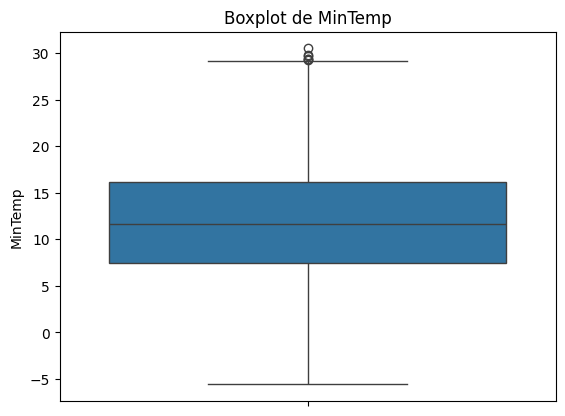

In [138]:
plt.title("Boxplot de MinTemp")
sns.boxplot(data = lluvia_sin_faltantes, y ="MinTemp")
plt.show()

In [139]:
outlier_inf_MinTemp, outlier_sup_MinTemp = calculo_outliers(lluvia_sin_faltantes["MinTemp"])
print("Cantidad de valores que se exceden del bigote inferior en la variable MinTemp: " + str(outlier_inf_MinTemp.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable MinTemp: " + str(outlier_sup_MinTemp.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable MinTemp: 0
Cantidad de valores que se exceden del bigote superior en la variable MinTemp: 6


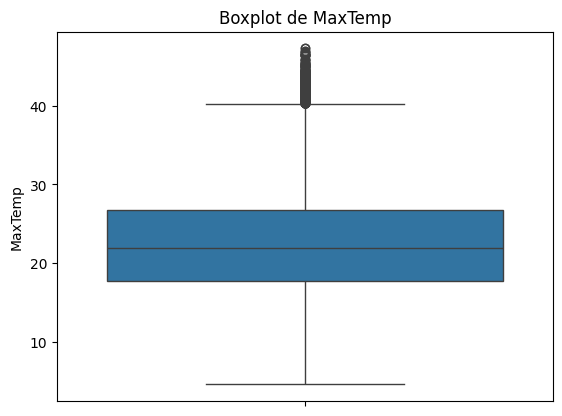

In [140]:
plt.title("Boxplot de MaxTemp")
sns.boxplot(data = lluvia_sin_faltantes, y ="MaxTemp")
plt.show()

In [141]:
outlier_inf_MaxTemp, outlier_sup_MaxTemp = calculo_outliers(lluvia_sin_faltantes["MaxTemp"])
print("Cantidad de valores que se exceden del bigote inferior en la variable MaxTemp: " + str(outlier_inf_MaxTemp.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable MaxTemp: " + str(outlier_sup_MaxTemp.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable MaxTemp: 0
Cantidad de valores que se exceden del bigote superior en la variable MaxTemp: 622


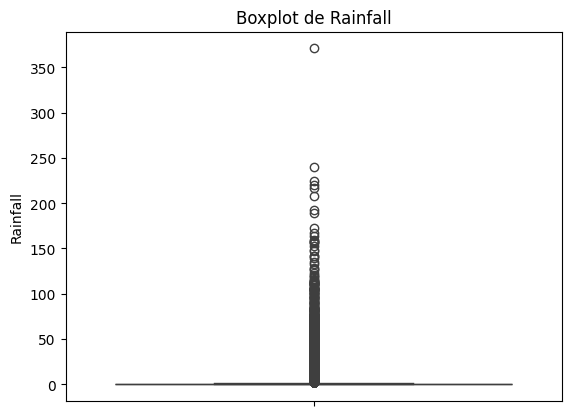

In [142]:
plt.title("Boxplot de Rainfall")
sns.boxplot(data = lluvia_sin_faltantes, y = "Rainfall")
plt.show()

In [143]:
outlier_inf_Rainfall, outlier_sup_Rainfall = calculo_outliers(lluvia_sin_faltantes["Rainfall"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Rainfall: " + str(outlier_inf_Rainfall.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Rainfall: " + str(outlier_sup_Rainfall.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Rainfall: 0
Cantidad de valores que se exceden del bigote superior en la variable Rainfall: 12685


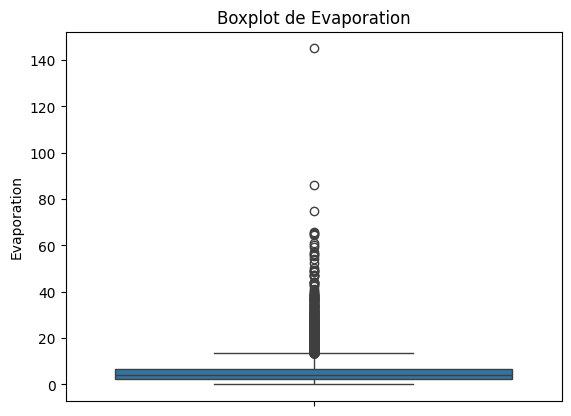

In [144]:
plt.title("Boxplot de Evaporation")
sns.boxplot(data = lluvia_sin_faltantes, y = "Evaporation")
plt.show()

In [145]:
outlier_inf_Evaporation, outlier_sup_Evaporation = calculo_outliers(lluvia_sin_faltantes["Evaporation"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Evaporation: " + str(outlier_inf_Evaporation.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Evaporation: " + str(outlier_sup_Evaporation.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Evaporation: 0
Cantidad de valores que se exceden del bigote superior en la variable Evaporation: 1166


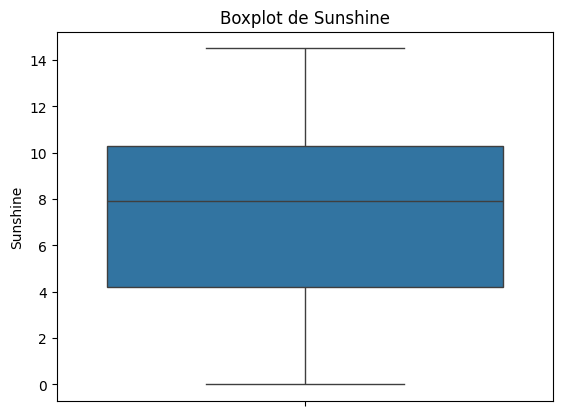

In [146]:
plt.title("Boxplot de Sunshine")
sns.boxplot(data = lluvia_sin_faltantes, y = "Sunshine")
plt.show()

In [147]:
outlier_inf_Sunshine, outlier_sup_Sunshine = calculo_outliers(lluvia_sin_faltantes["Sunshine"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Sunshine: " + str(outlier_inf_Sunshine.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Sunshine: " + str(outlier_sup_Sunshine.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Sunshine: 0
Cantidad de valores que se exceden del bigote superior en la variable Sunshine: 0


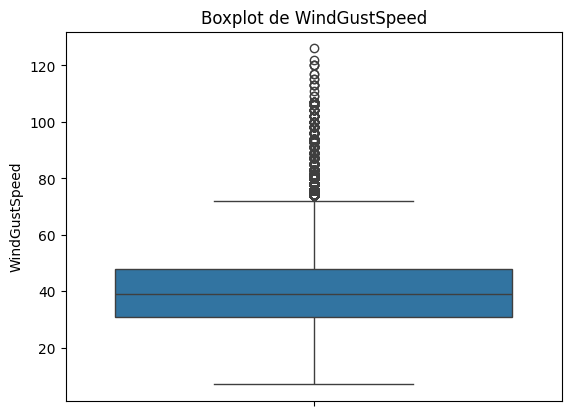

In [148]:
plt.title("Boxplot de WindGustSpeed")
sns.boxplot(data = lluvia_sin_faltantes, y = "WindGustSpeed")
plt.show()

In [149]:
outlier_inf_WindGustSpeed, outlier_sup_WindGustSpeed = calculo_outliers(lluvia_sin_faltantes["WindGustSpeed"])
print("Cantidad de valores que se exceden del bigote inferior en la variable WindGustSpeed: " + str(outlier_inf_WindGustSpeed.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable WindGustSpeed: " + str(outlier_sup_WindGustSpeed.shape[0]))


Cantidad de valores que se exceden del bigote inferior en la variable WindGustSpeed: 0
Cantidad de valores que se exceden del bigote superior en la variable WindGustSpeed: 1694


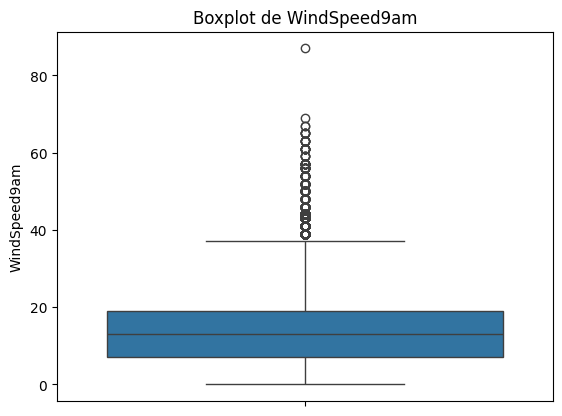

In [150]:
plt.title("Boxplot de WindSpeed9am")
sns.boxplot(data = lluvia_sin_faltantes, y = "WindSpeed9am")
plt.show()

In [151]:
outlier_inf_WindSpeed9am, outlier_sup_WindSpeed9am = calculo_outliers(lluvia_sin_faltantes["WindSpeed9am"])
print("Cantidad de valores que se exceden del bigote inferior en la variable WindSpeed9am: " + str(outlier_inf_WindSpeed9am.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable WindSpeed9am: " + str(outlier_sup_WindSpeed9am.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable WindSpeed9am: 0
Cantidad de valores que se exceden del bigote superior en la variable WindSpeed9am: 1119


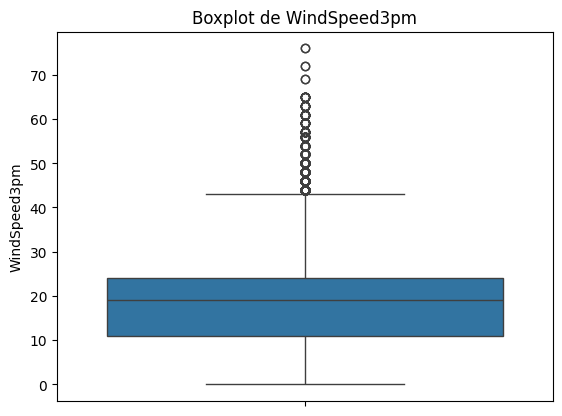

In [152]:
plt.title("Boxplot de WindSpeed3pm")
sns.boxplot(data = lluvia_sin_faltantes, y = "WindSpeed3pm")
plt.show()

In [153]:
outlier_inf_WindSpeed3pm, outlier_sup_WindSpeed3pm = calculo_outliers(lluvia_sin_faltantes["WindSpeed3pm"])
print("Cantidad de valores que se exceden del bigote inferior en la variable WindSpeed3pm: " + str(outlier_inf_WindSpeed3pm.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable WindSpeed3pm: " + str(outlier_sup_WindSpeed3pm.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable WindSpeed3pm: 0
Cantidad de valores que se exceden del bigote superior en la variable WindSpeed3pm: 797


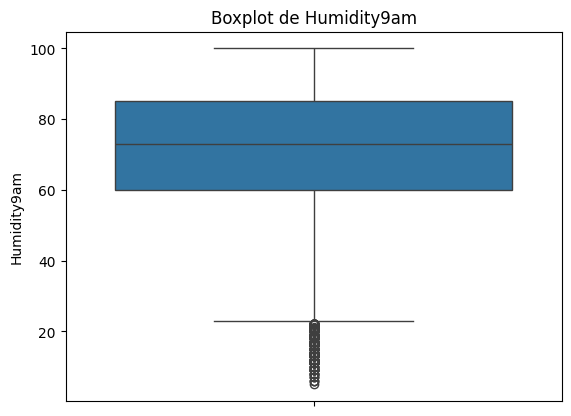

In [154]:
plt.title("Boxplot de Humidity9am")
sns.boxplot(data = lluvia_sin_faltantes, y = "Humidity9am")
plt.show()

In [155]:
outlier_inf_Humidity9am, outlier_sup_Humidity9am = calculo_outliers(lluvia_sin_faltantes["Humidity9am"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Humidity9am: " + str(outlier_inf_Humidity9am.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Humidity9am: " + str(outlier_sup_Humidity9am.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Humidity9am: 483
Cantidad de valores que se exceden del bigote superior en la variable Humidity9am: 0


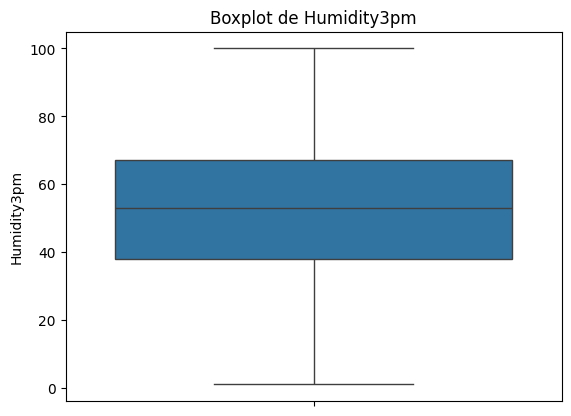

In [156]:
plt.title("Boxplot de Humidity3pm")
sns.boxplot(data = lluvia_sin_faltantes, y = "Humidity3pm")
plt.show()

In [157]:
outlier_inf_Humidity3pm, outlier_sup_Humidity3pm = calculo_outliers(lluvia_sin_faltantes["Humidity3pm"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Humidity3pm: " + str(outlier_inf_Humidity3pm.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Humidity3pm: " + str(outlier_sup_Humidity3pm.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Humidity3pm: 0
Cantidad de valores que se exceden del bigote superior en la variable Humidity3pm: 0


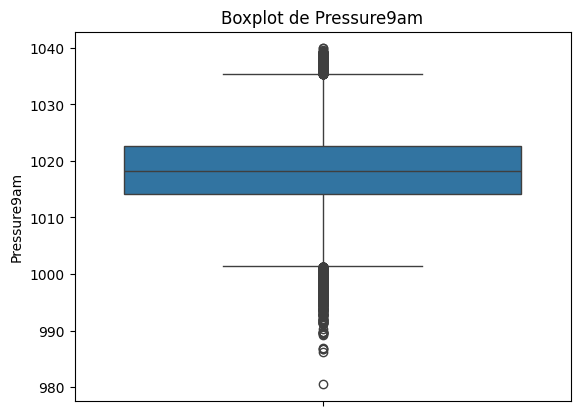

In [158]:
plt.title("Boxplot de Pressure9am")
sns.boxplot(data = lluvia_sin_faltantes, y = "Pressure9am")
plt.show()

In [159]:
outlier_inf_Pressure9am, outlier_sup_Pressure9am = calculo_outliers(lluvia_sin_faltantes["Pressure9am"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Pressure9am: " + str(outlier_inf_Pressure9am.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Pressure9am: " + str(outlier_sup_Pressure9am.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Pressure9am: 752
Cantidad de valores que se exceden del bigote superior en la variable Pressure9am: 421


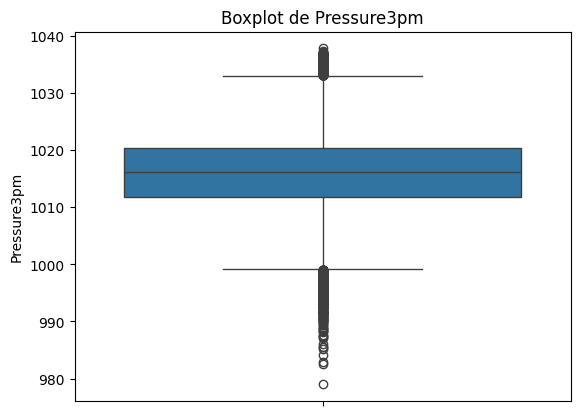

In [160]:
plt.title("Boxplot de Pressure3pm")
sns.boxplot(data = lluvia_sin_faltantes, y = "Pressure3pm")
plt.show()

In [161]:
outlier_inf_Pressure3pm, outlier_sup_Pressure3pm = calculo_outliers(lluvia_sin_faltantes["Pressure3pm"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Pressure3pm: " + str(outlier_inf_Pressure3pm.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Pressure3pm: " + str(outlier_sup_Pressure3pm.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Pressure3pm: 676
Cantidad de valores que se exceden del bigote superior en la variable Pressure3pm: 401


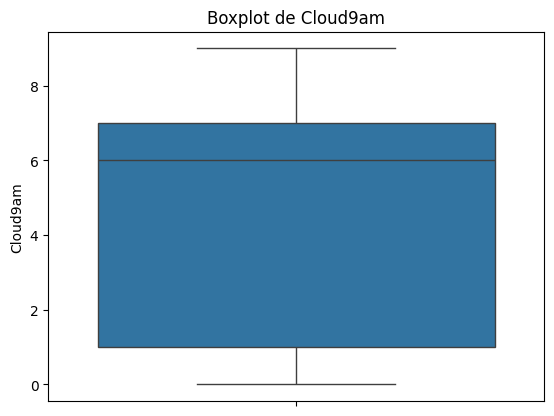

In [162]:
plt.title("Boxplot de Cloud9am")
sns.boxplot(data = lluvia_sin_faltantes, y = "Cloud9am")
plt.show()

In [163]:
outlier_inf_Cloud9am, outlier_sup_Cloud9am = calculo_outliers(lluvia_sin_faltantes["Cloud9am"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Cloud9am: " + str(outlier_inf_Cloud9am.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Cloud9am: " + str(outlier_sup_Cloud9am.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Cloud9am: 0
Cantidad de valores que se exceden del bigote superior en la variable Cloud9am: 0


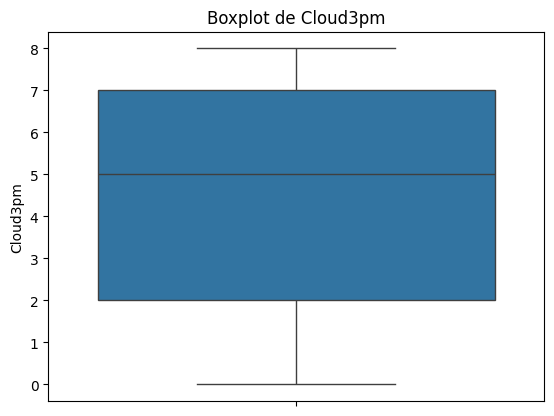

In [164]:
plt.title("Boxplot de Cloud3pm")
sns.boxplot(data = lluvia_sin_faltantes, y = "Cloud3pm")
plt.show()

In [165]:
outlier_inf_Cloud3pm, outlier_sup_Cloud3pm = calculo_outliers(lluvia_sin_faltantes["Cloud3pm"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Cloud3pm: " + str(outlier_inf_Cloud3pm.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Cloud3pm: " + str(outlier_sup_Cloud3pm.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Cloud3pm: 0
Cantidad de valores que se exceden del bigote superior en la variable Cloud3pm: 0


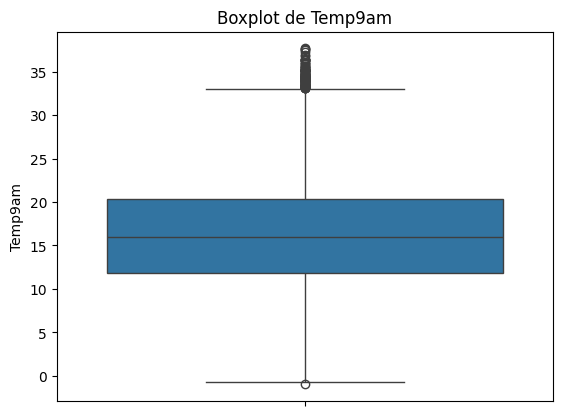

In [166]:
plt.title("Boxplot de Temp9am")
sns.boxplot(data = lluvia_sin_faltantes, y = "Temp9am")
plt.show()

In [167]:
outlier_inf_Temp9am, outlier_sup_Temp9am = calculo_outliers(lluvia_sin_faltantes["Temp9am"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Temp9am: " + str(outlier_inf_Temp9am.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Temp9am: " + str(outlier_sup_Temp9am.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Temp9am: 1
Cantidad de valores que se exceden del bigote superior en la variable Temp9am: 111


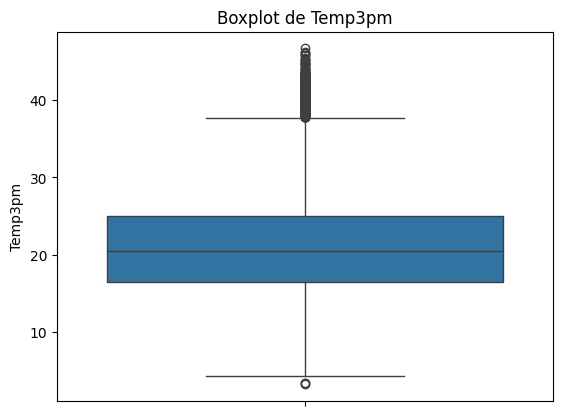

In [168]:
plt.title("Boxplot de Temp3pm")
sns.boxplot(data = lluvia_sin_faltantes, y = "Temp3pm")
plt.show()

In [169]:
outlier_inf_Temp3pm, outlier_sup_Temp3pm = calculo_outliers(lluvia_sin_faltantes["Temp3pm"])
print("Cantidad de valores que se exceden del bigote inferior en la variable Temp3pm: " + str(outlier_inf_Temp3pm.shape[0]))
print("Cantidad de valores que se exceden del bigote superior en la variable Temp3pm: " + str(outlier_sup_Temp3pm.shape[0]))

Cantidad de valores que se exceden del bigote inferior en la variable Temp3pm: 3
Cantidad de valores que se exceden del bigote superior en la variable Temp3pm: 808


Como se pueden observar en los gráficos de Boxplots, algunas variables cuantitativas tienen valores que superan los bigotes inferiores como superiores, pero en general no representan una cantidad significativa ni tampoco son valores irreales. Por esta misma razón, se decidío conservar dichos outliers.

#### Analisis multivariado - Rainfall vs Evaporation

Se trabajara con una porción de los datos.

In [80]:
muestra = lluvia_sin_faltantes.sample(38500,random_state = 10 )
muestra = muestra[["Rainfall", "Evaporation"]]

In [81]:
vmedias = np.mean(muestra[["Rainfall", "Evaporation"]])

x_dif = muestra[["Rainfall", "Evaporation"]] - vmedias

cov = muestra[["Rainfall", "Evaporation"]].cov().values
inv_cov = np.linalg.inv(cov)

mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

muestra["mahalanobis_Evaporation_Rainfall"] = mahal.diagonal()

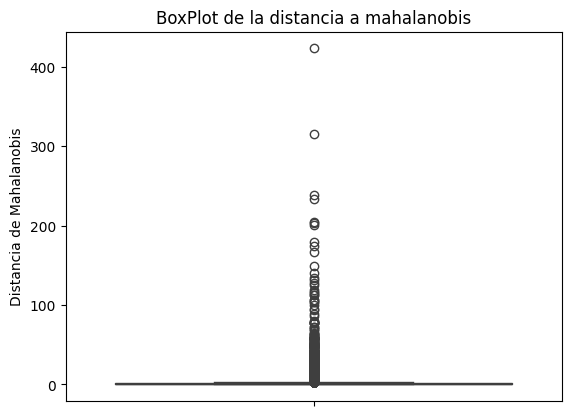

In [82]:
sns.boxplot(y = muestra.mahalanobis_Evaporation_Rainfall)
plt.title("BoxPlot de la distancia a mahalanobis")
plt.ylabel("Distancia de Mahalanobis")
plt.show()

In [83]:
muestra["mahalanobis_Evaporation_Rainfall"].describe()

,mahalanobis_Evaporation_Rainfall
count,21983.000000
mean,1.793813
std,7.677900
min,0.000171
25%,0.209841
50%,0.430242
75%,1.202654
max,423.089376


In [84]:
percentil = muestra["mahalanobis_Evaporation_Rainfall"].quantile(0.990)
print(f"Tomaremos el percentil 99 % como umbral, lo que corresponde a un valor de {percentil:.2f}")


Tomaremos el percentil 99 % como umbral, lo que corresponde a un valor de 23.16


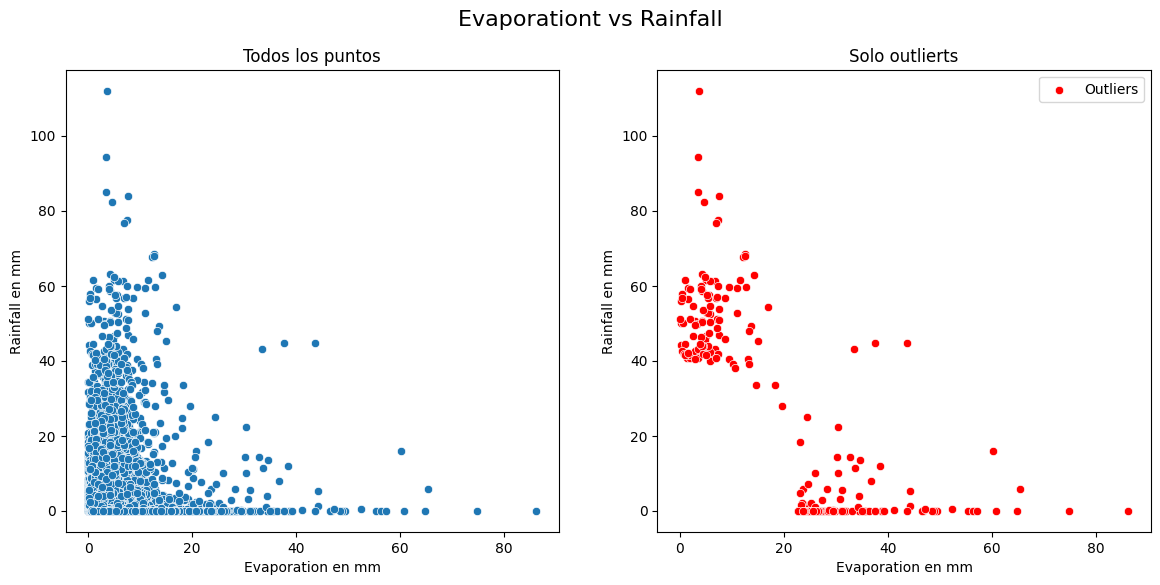

In [85]:
maha = muestra[muestra['mahalanobis_Evaporation_Rainfall'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot( x = muestra.Evaporation, y = muestra.Rainfall, ax=axes[0])
axes[0].set_title("Todos los puntos")
axes[0].set_xlabel("Evaporation en mm")
axes[0].set_ylabel("Rainfall en mm")

sns.scatterplot(x = maha.Evaporation, y = maha.Rainfall, ax=axes[1], color = "red", label="Outliers")
axes[1].set_title("Solo outlierts")
axes[1].set_xlabel("Evaporation en mm")
axes[1].set_ylabel("Rainfall en mm")

plt.suptitle("Evaporationt vs Rainfall", fontsize=16)

plt.show()

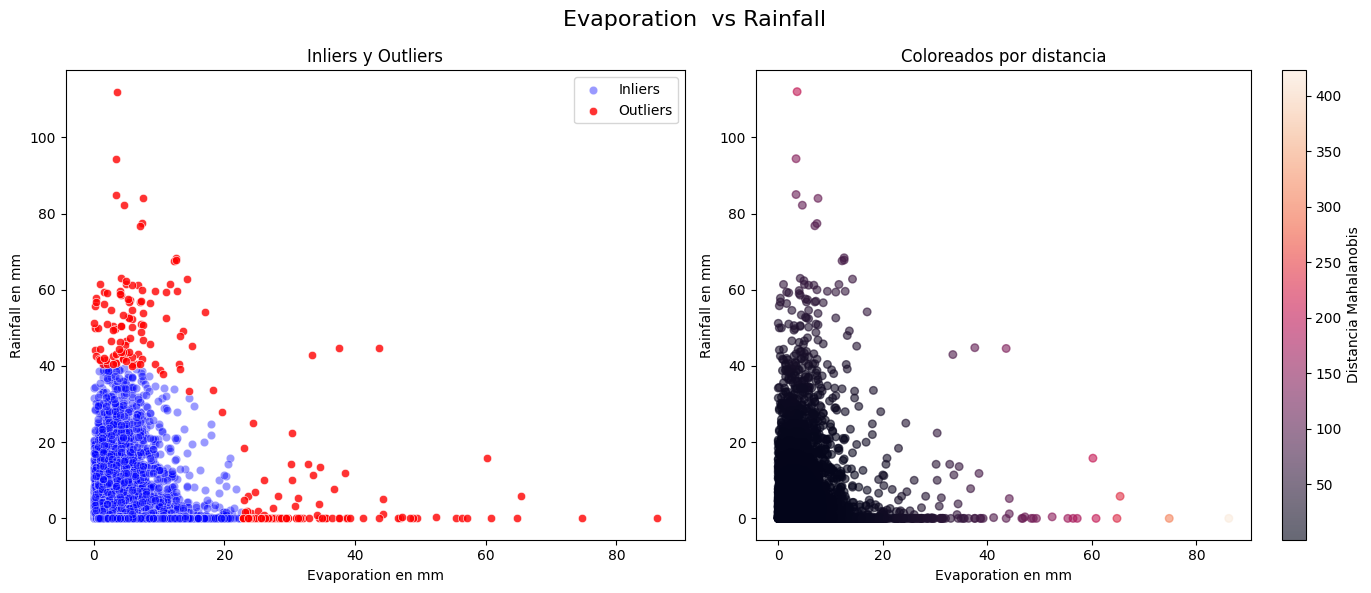

In [86]:
inliers = muestra[muestra['mahalanobis_Evaporation_Rainfall'] <= percentil]
outliers = muestra[muestra['mahalanobis_Evaporation_Rainfall'] > percentil]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x = inliers.Evaporation, y = inliers.Rainfall, color="blue", ax = axes[0], alpha = 0.4, label = "Inliers")
sns.scatterplot(x = outliers.Evaporation, y = outliers.Rainfall, color="red", ax = axes[0], alpha = 0.8, label = "Outliers")
axes[0].set_title("Inliers y Outliers")
axes[0].set_xlabel("Evaporation en mm")
axes[0].set_ylabel("Rainfall en mm")

sc = axes[1].scatter(x = muestra["Evaporation"], y = muestra["Rainfall"], c = muestra["mahalanobis_Evaporation_Rainfall"], cmap = "rocket", s = 30, alpha = 0.6)
fig.colorbar(sc, ax = axes[1], label = "Distancia Mahalanobis")
axes[1].set_title("Coloreados por distancia")
axes[1].set_xlabel("Evaporation en mm")
axes[1].set_ylabel("Rainfall en mm")

plt.suptitle("Evaporation  vs Rainfall", fontsize=16)

plt.tight_layout()
plt.show()

*Nota:* Se pueden observar una cantidad mínima de *outliers*, los cuales no serán eliminados, ya que estamos trabajando con una porción del conjunto de datos debido a limitaciones de recursos (memoria RAM). Además queremos conservar la máxima cantidad de información posible, ya que contamos con una cantidad moderada de datos.

# Creación de nuevos features

In [ ]:
# Cargamos los datos que ya fueron pre-procesados.
lluvias_filtradas = pd.read_csv("/content/datos_filtrados.csv")

In [ ]:
# Vemos el estado de nuestro data set ya trabajado
lluvias_filtradas.shape

(71118, 23)

Vamos a transformar la columna `Date` en dos columnas `Year` y `Month`, no sé tendra en cuanta el día, ya que creemos que no nos aportara mucha información al ser algo tan minunsioso.





In [ ]:
lluvias_filtradas['Date'] = pd.to_datetime(lluvias_filtradas['Date'])
lluvias_filtradas['Year'] = lluvias_filtradas['Date'].dt.year
lluvias_filtradas['Month'] = lluvias_filtradas['Date'].dt.month
lluvias_filtradas = lluvias_filtradas.drop('Date', axis = 1)

# Enconding

Vamos a realizar enconding de las siguientes variables categoricas `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` y `RainTomorrow`.

Son variables de tipo `object`, por lo tanto, estamos obligados a hacerle este tratamiento.

In [ ]:
lluvias_filtradas = pd.get_dummies(lluvias_filtradas, columns=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"], drop_first=True)

# Normalización

Se aplicó una normalización *z-score*, con el objetivo de evitar que atributos con mayores magnitudes tengan pesos muy diferentes al resto, además no que no queremos una variable solo por la unidad de medida.

In [ ]:
scaler = StandardScaler()
columnas = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
lluvias_filtradas[columnas] = scaler.fit_transform(lluvias_filtradas[columnas])


# Modelos

In [7]:
# Cargamos el data set con el cual vamos a trabajar con los modelos
lluvia_procesada = pd.read_csv("/content/datos_procesados.csv")

In [10]:
# Vemos la cantidad de valores de la variable que vamos a predecir:
lluvia_procesada['RainTomorrow_Yes'].value_counts()

,count
RainTomorrow_Yes,
False,55179
True,15939


In [11]:
# Vemos su porcentaje:
lluvia_procesada['RainTomorrow_Yes'].value_counts(normalize = True) * 100

,proportion
RainTomorrow_Yes,
False,77.587952
True,22.412048


## Árbol de decisión

### Optimizar hiper - parámetros

In [9]:
#RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 0.5,random_state=10)

#Creo un dataset con los features que voy a usar para clasificar
lluvia_x = lluvia_procesada.drop(['RainTomorrow_Yes'], axis = 'columns', inplace = False)

#Creo un dataset con la variable target
lluvia_y = lluvia_procesada['RainTomorrow_Yes'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(lluvia_x,
                                                    lluvia_y,
                                                    test_size = 0.2,     # Proporcion 80/20
                                                    random_state = 10,
                                                    stratify = lluvia_y) # Mantiene la proporcion de Yes y No en train/test

x1_train_res, y1_train_res = ros.fit_resample(x_train, y_train)

In [10]:
# Vemos la nueva cantidad de valores en la variable que vamos a predecir:
y1_train_res.value_counts()

,count
RainTomorrow_Yes,
False,44143
True,22071


In [11]:
# Vemos el nuevo porcentaje de valores en la variable que vamos a predecir:
y1_train_res.value_counts(normalize=True)*100

,proportion
RainTomorrow_Yes,
False,66.66717
True,33.33283


In [12]:
params_grid = {'criterion':['gini', 'entropy', 'log_loss'],
               'max_depth': list(range(5,18)), # Profundidad del árbol
               'min_samples_split': list(range(20, 70)), # Define el número mínimo de muestras necesarias para dividir un nodo
               'min_samples_leaf': list(range(40, 70)), # Cantidad mínima de muestras que debe haber en un nodo hoja
               }

kfoldcv = StratifiedKFold(n_splits = 5)
base_tree = tree.DecisionTreeClassifier(random_state = 10)
scorer_fn = make_scorer(f1_score, pos_label = True)
randomcv = RandomizedSearchCV(estimator = base_tree,
                              param_distributions = params_grid,
                              scoring = scorer_fn,
                              cv = kfoldcv,
                              n_iter = 50,
                              n_jobs = -1,
                              random_state = 10)

RSCV_multimetrica_fit= randomcv.fit(x1_train_res, y1_train_res)


In [13]:
print("Mejores hiperparametros del arbol: " + str(RSCV_multimetrica_fit.best_params_))
print("Mejor F1-macro score (CV):", RSCV_multimetrica_fit.best_score_)

Mejores hiperparametros del arbol: {'min_samples_split': 57, 'min_samples_leaf': 50, 'max_depth': 16, 'criterion': 'gini'}
Mejor F1-macro score (CV): 0.6837258214593186


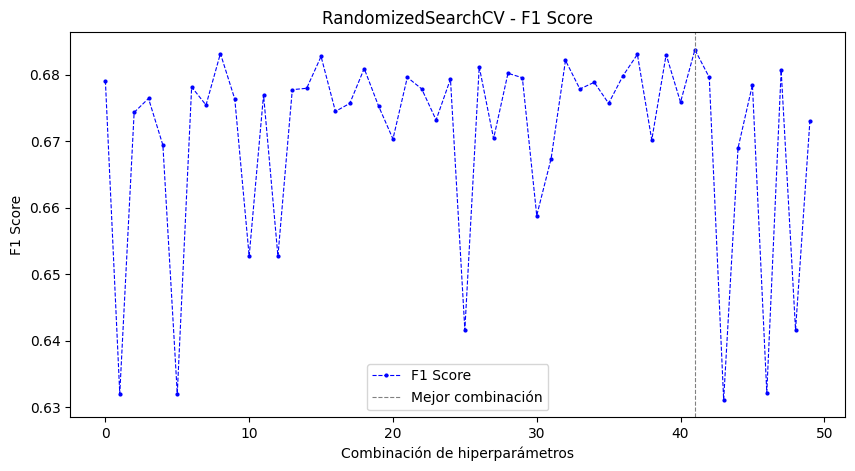

In [14]:
# Valores de F1 Score para cada combinación de hiperparámetros
f1_vals = RSCV_multimetrica_fit.cv_results_['mean_test_score']

# Índice de la mejor combinación
best_idx = np.argmax(f1_vals)

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(f1_vals, linestyle = '--', linewidth = 0.8, marker ='o', markersize = 2, color = 'b', label = 'F1 Score')
plt.axvline(best_idx, linestyle = '--', linewidth = 0.8, color = 'grey', label = 'Mejor combinación')
plt.xlabel("Combinación de hiperparámetros")
plt.ylabel("F1 Score")
plt.title("RandomizedSearchCV - F1 Score")
plt.legend()
plt.show()

### Árbol de decisión después RandomizedSearchCV

In [15]:
optimizado_tree = tree.DecisionTreeClassifier(**RSCV_multimetrica_fit.best_params_ ,random_state = 10)
optimizado_tree.fit(x1_train_res, y1_train_res)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=50, min_samples_split=57,
                       random_state=10)

#### Performance del Árbol de decisión en Test:

              precision    recall  f1-score   support

       False       0.89      0.88      0.88     11036
        True       0.59      0.61      0.60      3188

    accuracy                           0.82     14224
   macro avg       0.74      0.74      0.74     14224
weighted avg       0.82      0.82      0.82     14224



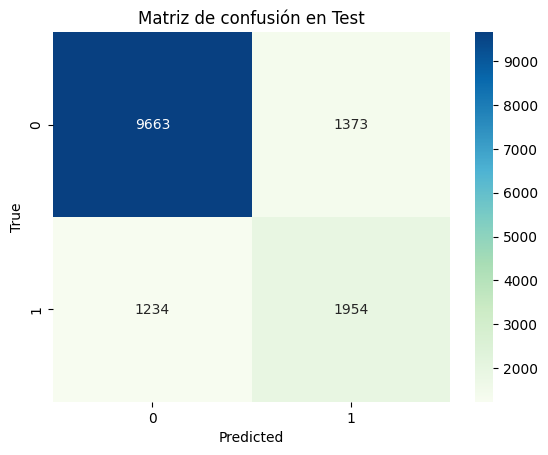

In [16]:
y_pred = optimizado_tree.predict(x_test)
print(classification_report(y_test, y_pred))
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Test")
plt.show()


In [17]:
accuracy_test = accuracy_score(y_test,y_pred)
recall_test = recall_score(y_test,y_pred)
precision_test = precision_score(y_test,y_pred)
f1_test = f1_score(y_test,y_pred,)

print("Accuracy: "+str(accuracy_test))
print("Recall: "+str(recall_test))
print("Precision: "+str(precision_test))
print("f1 score: "+str(f1_test))

Accuracy: 0.8167182227221598
Recall: 0.6129234629861983
Precision: 0.5873159002103998
f1 score: 0.599846508058327


#### Performance del Árbol de decisión en Train:

              precision    recall  f1-score   support

       False       0.85      0.90      0.87     44143
        True       0.77      0.69      0.73     22071

    accuracy                           0.83     66214
   macro avg       0.81      0.79      0.80     66214
weighted avg       0.82      0.83      0.83     66214



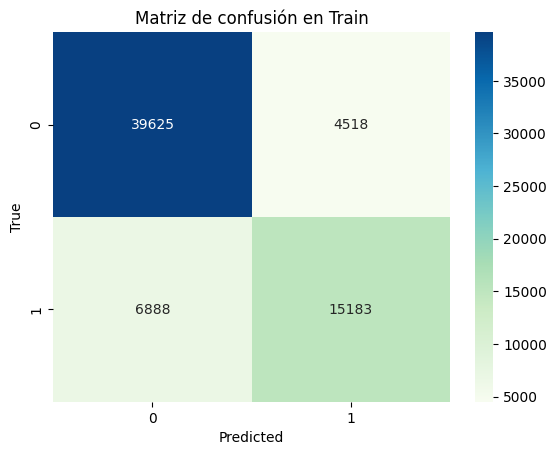

In [18]:
y_pred = optimizado_tree.predict(x1_train_res)
print(classification_report(y1_train_res, y_pred))
tabla=confusion_matrix(y1_train_res, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Train")
plt.show()

In [19]:
accuracy_train = accuracy_score(y1_train_res,y_pred)
recall_train = recall_score(y1_train_res,y_pred)
precision_train = precision_score(y1_train_res,y_pred)
f1_train = f1_score(y1_train_res,y_pred,)


print("Accuracy: "+str(accuracy_train))
print("Recall: "+str(recall_train))
print("Precision: "+str(precision_train))
print("f1 score: "+str(f1_train))

Accuracy: 0.8277403570241942
Recall: 0.6879162702188392
Precision: 0.7706715395157606
f1 score: 0.7269462798046539


### Características del Árbol de decisión

In [20]:
importancia = sorted(list(zip(lluvia_x.columns.to_list(), optimizado_tree.feature_importances_)), key=lambda x: -x[1])
print("Los 3 features más importantes:")
for feature, score in importancia[:3]:
  print(f"   {feature}: {score:.3f}")

Los 3 features más importantes:
   Humidity3pm: 0.523
   WindGustSpeed: 0.103
   Sunshine: 0.084


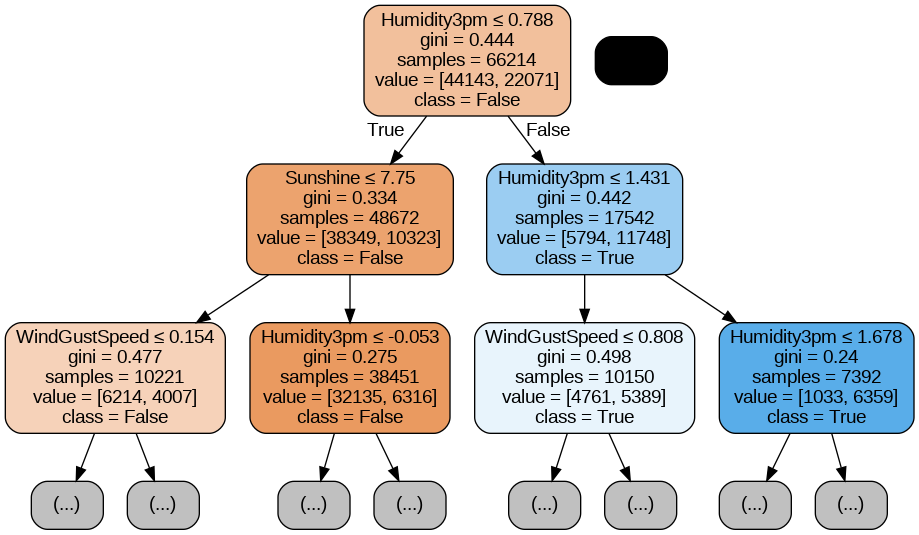

In [21]:
dot_data = StringIO()
export_graphviz(optimizado_tree,
                out_file=dot_data,
                max_depth=2,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=x_train.columns,
                class_names=[str(c) for c in optimizado_tree.classes_])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [22]:
dot_data = StringIO()
export_graphviz(optimizado_tree,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=x_train.columns,
                class_names=[str(c) for c in optimizado_tree.classes_])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [23]:
r = tree.export_text(optimizado_tree, feature_names=list(lluvia_x.columns))
print(r)

|--- Humidity3pm <= 0.79
|   |--- Sunshine <= 7.75
|   |   |--- WindGustSpeed <= 0.15
|   |   |   |--- Pressure3pm <= 0.02
|   |   |   |   |--- Humidity3pm <= -0.35
|   |   |   |   |   |--- Humidity3pm <= -1.14
|   |   |   |   |   |   |--- Month <= 4.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- Month >  4.50
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Humidity3pm >  -1.14
|   |   |   |   |   |   |--- Pressure3pm <= -0.62
|   |   |   |   |   |   |   |--- Pressure9am <= -0.70
|   |   |   |   |   |   |   |   |--- Evaporation <= 5.90
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- Evaporation >  5.90
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- Pressure9am >  -0.70
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- Pressure3pm >  -0.62
|   |   |   |   |   |   |   |--- Cloud3pm <= 5.50
|   |   |   |   |   |   |   |   |---

### Guardamos el modelo

In [44]:
joblib.dump(optimizado_tree, 'optimizado_tree.joblib')

['optimizado_tree.joblib']

## Random Forest

### Optimizar hiper - parámetros

In [26]:
#RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 0.65,random_state=10)

#Creo un dataset con los features que voy a usar para clasificar
lluvia_x = lluvia_procesada.drop(['RainTomorrow_Yes'], axis = 'columns', inplace = False)

#Creo un dataset con la variable target
lluvia_y = lluvia_procesada['RainTomorrow_Yes'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(lluvia_x,
                                                    lluvia_y,
                                                    test_size = 0.2,     # Proporcion 80/20
                                                    random_state = 10,
                                                    stratify = lluvia_y) # Mantiene la proporcion de Yes y No en train/test
x1_train_res, y1_train_res = ros.fit_resample(x_train, y_train)

In [27]:
# Vemos la nueva cantidad de valores en la variable que vamos a predecir:
y1_train_res.value_counts()

,count
RainTomorrow_Yes,
False,44143
True,28692


In [28]:
# Vemos el nuevo porcentaje de valores en la variable que vamos a predecir:
y1_train_res.value_counts(normalize=True)*100

,proportion
RainTomorrow_Yes,
False,60.606851
True,39.393149


In [29]:
params_grid = {'criterion':['gini', 'entropy'],
               'max_depth': list(range(5,30)), # Profundidad del árbol
               'min_samples_split': list(range(2,50)), # Define el número mínimo de muestras necesarias para dividir un nodo
               'min_samples_leaf': list(range(10,40)), # Cantidad mínima de muestras que debe haber en un nodo hoja
               'n_estimators': [100, 150, 200],
               'max_features': ['sqrt','log2'],
               'max_samples':  [0.6, 0.7, 0.8]}

kfoldcv = StratifiedKFold(n_splits = 5)
rf_cv = RandomForestClassifier(bootstrap =True, oob_score=True, random_state = 10)
scorer_fn = make_scorer(f1_score, pos_label = True)
random_ft_cv = RandomizedSearchCV(estimator = rf_cv,
                              param_distributions = params_grid,
                              scoring = scorer_fn,
                              cv = kfoldcv,
                              n_iter = 10,
                              n_jobs = -1,
                              random_state = 10)

RSCV_multimetrica_fit_ft= random_ft_cv.fit(x1_train_res, y1_train_res)

In [30]:
print("Mejores hiperparametros del Ramdom Forest: " + str(RSCV_multimetrica_fit_ft.best_params_))
print("Mejor F1-macro score (CV):", RSCV_multimetrica_fit_ft.best_score_)

Mejores hiperparametros del Ramdom Forest: {'n_estimators': 100, 'min_samples_split': 29, 'min_samples_leaf': 10, 'max_samples': 0.8, 'max_features': 'log2', 'max_depth': 28, 'criterion': 'gini'}
Mejor F1-macro score (CV): 0.7615020593992958


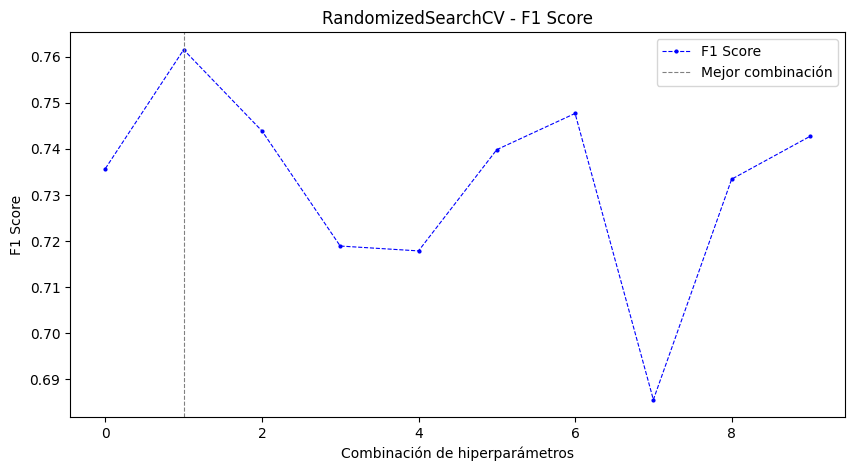

In [31]:
# Valores de F1 Score para cada combinación de hiperparámetros
f1_vals = RSCV_multimetrica_fit_ft.cv_results_['mean_test_score']

# Índice de la mejor combinación
best_idx = np.argmax(f1_vals)

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(f1_vals, linestyle = '--', linewidth = 0.8, marker ='o', markersize = 2, color = 'b', label = 'F1 Score')
plt.axvline(best_idx, linestyle = '--', linewidth = 0.8, color = 'grey', label = 'Mejor combinación')
plt.xlabel("Combinación de hiperparámetros")
plt.ylabel("F1 Score")
plt.title("RandomizedSearchCV - F1 Score")
plt.legend()
plt.show()

### Random Forest después de RandomizedSearchCV

In [32]:
random_forest = RandomForestClassifier(**RSCV_multimetrica_fit_ft.best_params_,bootstrap =True,oob_score=True, random_state = 10)
random_forest.fit(x1_train_res, y1_train_res )

RandomForestClassifier(max_depth=28, max_features='log2', max_samples=0.8,
                       min_samples_leaf=10, min_samples_split=29,
                       oob_score=True, random_state=10)

#### Performance de Random Forest en Test

              precision    recall  f1-score   support

       False       0.89      0.90      0.89     11036
        True       0.64      0.63      0.63      3188

    accuracy                           0.84     14224
   macro avg       0.77      0.76      0.76     14224
weighted avg       0.84      0.84      0.84     14224



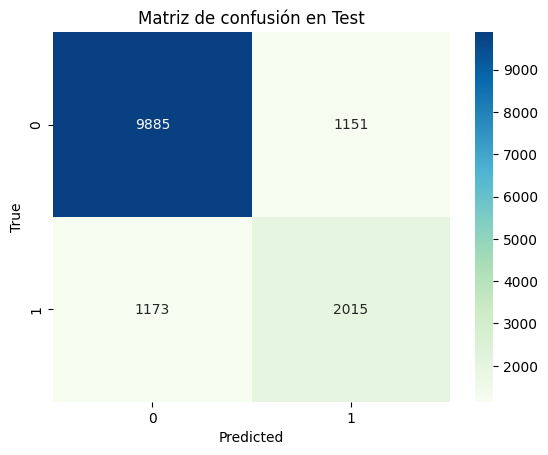

In [33]:
y_pred = random_forest.predict(x_test)
print(classification_report(y_test, y_pred))
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Test")
plt.show()

In [34]:
accuracy_test = accuracy_score(y_test,y_pred)
recall_test = recall_score(y_test,y_pred)
precision_test = precision_score(y_test,y_pred)
f1_test = f1_score(y_test,y_pred,)

print("Accuracy: "+str(accuracy_test))
print("Recall: "+str(recall_test))
print("Precision: "+str(precision_test))
print("f1 score: "+str(f1_test))

Accuracy: 0.8366141732283464
Recall: 0.6320577164366374
Precision: 0.6364497789008212
f1 score: 0.6342461441611583


#### Performance de Random Forest en Train

              precision    recall  f1-score   support

       False       0.86      0.92      0.89     44143
        True       0.87      0.77      0.82     28692

    accuracy                           0.86     72835
   macro avg       0.86      0.85      0.85     72835
weighted avg       0.86      0.86      0.86     72835



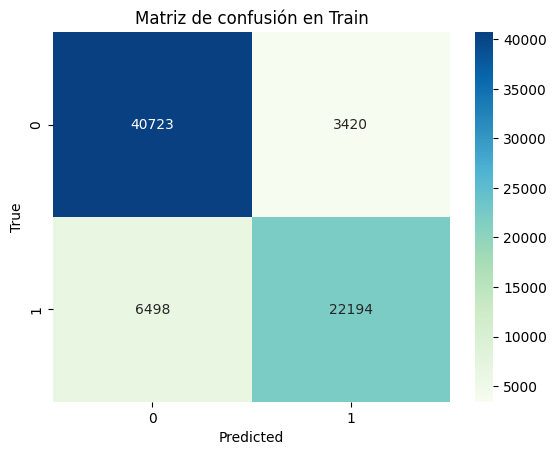

In [35]:
y_pred = random_forest.predict(x1_train_res)
print(classification_report(y1_train_res, y_pred))
tabla=confusion_matrix(y1_train_res, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Train")
plt.show()

In [36]:
accuracy_test = accuracy_score(y1_train_res,y_pred)
recall_test = recall_score(y1_train_res,y_pred)
precision_test = precision_score(y1_train_res,y_pred)
f1_test = f1_score(y1_train_res,y_pred)

print("Accuracy: "+str(accuracy_test))
print("Recall: "+str(recall_test))
print("Precision: "+str(precision_test))
print("f1 score: "+str(f1_test))

Accuracy: 0.8638292029930665
Recall: 0.773525721455458
Precision: 0.8664792691496838
f1 score: 0.8173682466025853


### Características del Random Forest

In [37]:
importancia = sorted(list(zip(lluvia_x.columns.to_list(), random_forest.feature_importances_)), key=lambda x: -x[1])
print("Los 3 features más importantes:")
for feature, score in importancia[:3]:
  print(f"   {feature}: {score:.3f}")

Los 3 features más importantes:
   Humidity3pm: 0.199
   Sunshine: 0.078
   Cloud3pm: 0.074


In [38]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

def vizualizar_arbol ( forest_model, tree_indice, max_depth):
  dot_data = StringIO()
  export_graphviz(forest_model.estimators_[tree_indice],
                  out_file=dot_data,
                  max_depth=max_depth,
                  filled=True,
                  rounded=True,
                  special_characters=True,
                  feature_names=x_train.columns,
                  class_names=[str(c) for c in forest_model.classes_])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())

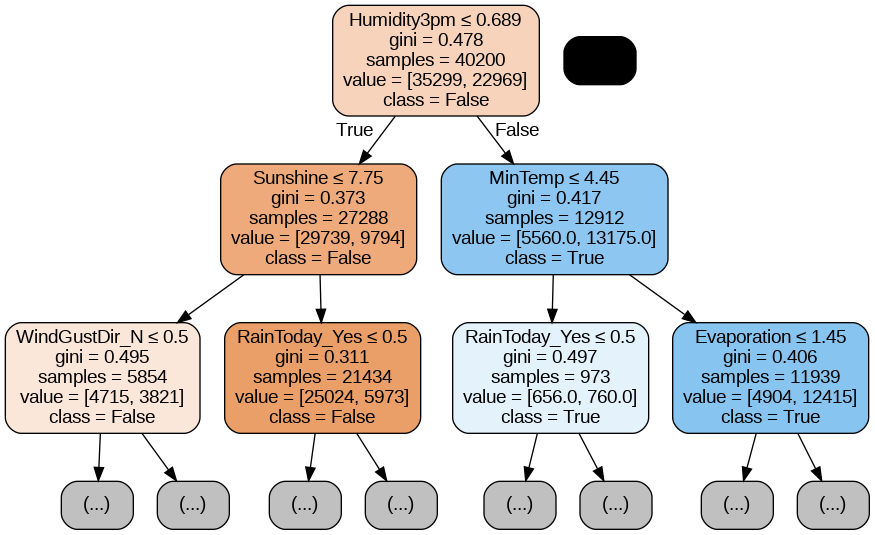

In [39]:
vizualizar_arbol(random_forest, 10, 2)

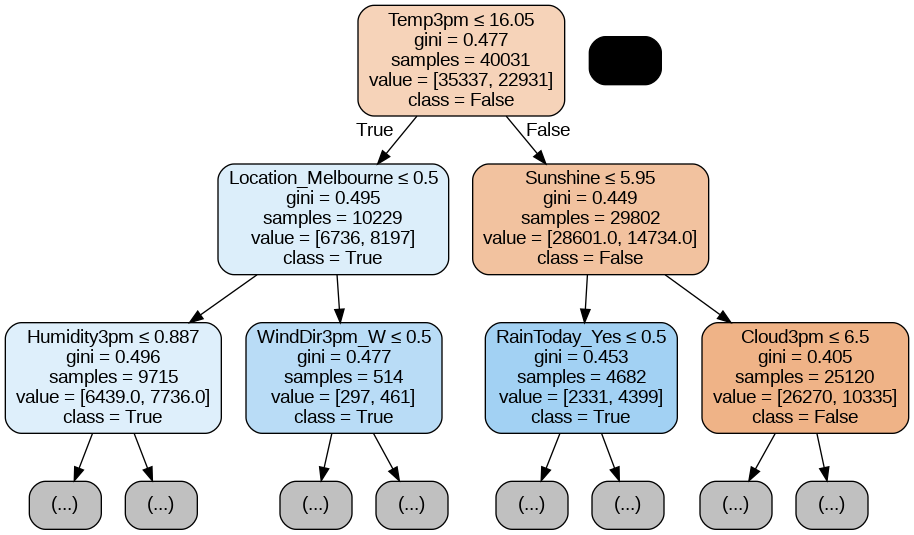

In [40]:
vizualizar_arbol(random_forest, 15, 2)

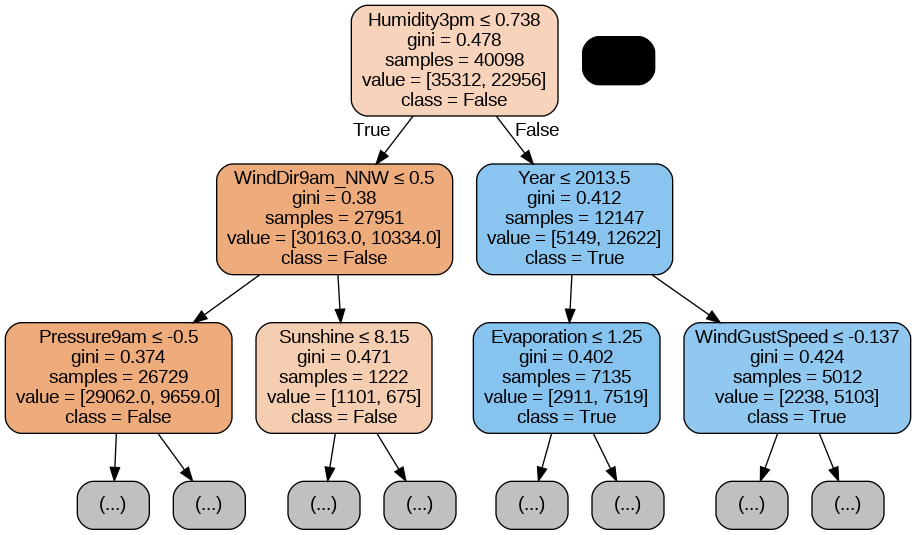

In [41]:
vizualizar_arbol(random_forest, 20, 2)

In [42]:
# Número de árboles en el bosque
print("Número de árboles:", len(random_forest.estimators_))

Número de árboles: 100


### Guardamos el modelo

In [46]:
joblib.dump(random_forest, 'random_forest.joblib')

['random_forest.joblib']

## XGBClassifier

### Optimizar hiper - parámetros

In [14]:
#Creo un dataset con los features que voy a usar para clasificar
lluvia_x = lluvia_procesada.drop(['RainTomorrow_Yes'], axis = 'columns', inplace = False)

#Creo un dataset con la variable target
lluvia_y = lluvia_procesada['RainTomorrow_Yes'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(lluvia_x,
                                                    lluvia_y,
                                                    test_size = 0.2,     # Proporcion 80/20
                                                    random_state = 10,
                                                    stratify = lluvia_y) # Mantiene la proporcion de Yes y No en train/test

In [15]:
from xgboost import XGBClassifier

params_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': list(range(4, 8)),           # profundidad de los árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # shrinkage
    'subsample': [0.6, 0.7, 0.8],             # porcentaje de filas por árbol
    'colsample_bytree': [0.6, 0.7, 0.8],      # porcentaje de columnas por árbol
    'reg_alpha': [0.30, 0.40, 0.50],                # regularización L1
    'reg_lambda': [4, 6, 8],                 # regularización L2
    'scale_pos_weight': [1.5, 2 , 2.5]
    }

kfoldcv = StratifiedKFold(n_splits = 5)
xgb_clf = XGBClassifier(use_label_encoder=False, random_state=10)
scorer_fn = make_scorer(f1_score, pos_label=True)

random_xgb_cv = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=params_grid,
    scoring=scorer_fn,
    cv=kfoldcv,
    n_iter=10,
    n_jobs=-1,
    random_state=10,
    verbose=1)

RSCV_xgb_fit = random_xgb_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:34:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
print("Mejores hiperparametros del XGB: " + str(RSCV_xgb_fit.best_params_))
print("Mejor F1-macro score (CV):", RSCV_xgb_fit.best_score_)

Mejores hiperparametros del XGB: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 8, 'reg_alpha': 0.5, 'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Mejor F1-macro score (CV): 0.6631106477589582


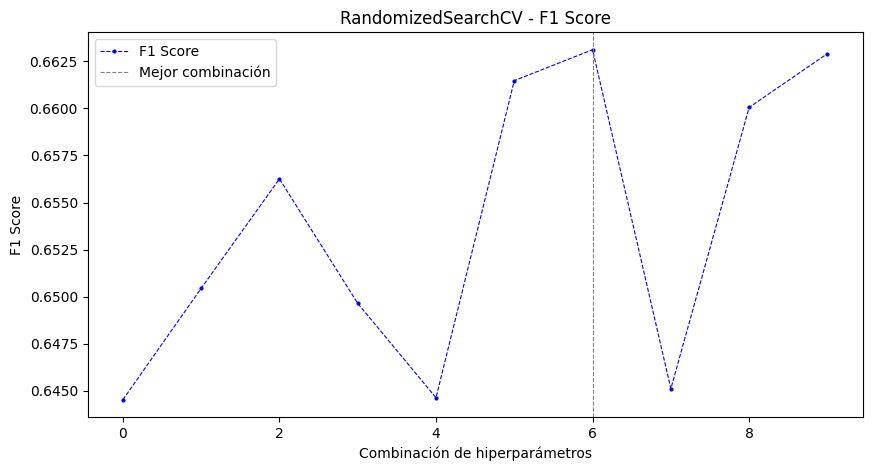

In [17]:
# Valores de F1 Score para cada combinación de hiperparámetros
f1_vals = RSCV_xgb_fit.cv_results_['mean_test_score']

# Índice de la mejor combinación
best_idx = np.argmax(f1_vals)

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(f1_vals, linestyle = '--', linewidth = 0.8, marker ='o', markersize = 2, color = 'b', label = 'F1 Score')
plt.axvline(best_idx, linestyle = '--', linewidth = 0.8, color = 'grey', label = 'Mejor combinación')
plt.xlabel("Combinación de hiperparámetros")
plt.ylabel("F1 Score")
plt.title("RandomizedSearchCV - F1 Score")
plt.legend()
plt.show()

### XGBClassifier después de RandomizedSearchCV

In [18]:
xgb_best = XGBClassifier(**RSCV_xgb_fit.best_params_, use_label_encoder=False, random_state=10)
xgb_best.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:34:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=450,
              n_jobs=None, num_parallel_tree=None, ...)

#### Performance de XGBClassifier en Test

              precision    recall  f1-score   support

       False       0.91      0.90      0.90     11036
        True       0.65      0.68      0.66      3188

    accuracy                           0.85     14224
   macro avg       0.78      0.79      0.78     14224
weighted avg       0.85      0.85      0.85     14224



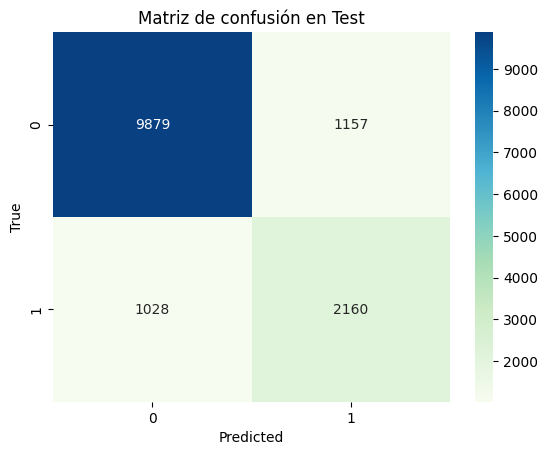

In [19]:
y_pred = xgb_best.predict(x_test)
print(classification_report(y_test, y_pred))
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Test")
plt.show()

In [20]:
accuracy_test = accuracy_score(y_test,y_pred)
recall_test = recall_score(y_test,y_pred)
precision_test = precision_score(y_test,y_pred)
f1_test = f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy_test))
print("Recall: "+str(recall_test))
print("Precision: "+str(precision_test))
print("f1 score: "+str(f1_test))

Accuracy: 0.8463863892013498
Recall: 0.6775407779171895
Precision: 0.6511908350919505
f1 score: 0.6641045349730976


#### Performance de XGBClassifier en Train

              precision    recall  f1-score   support

       False       0.94      0.92      0.93     44143
        True       0.74      0.78      0.76     12751

    accuracy                           0.89     56894
   macro avg       0.84      0.85      0.84     56894
weighted avg       0.89      0.89      0.89     56894



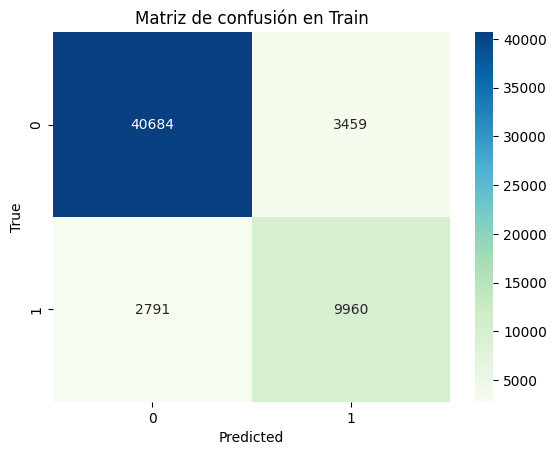

In [22]:
y_pred = xgb_best.predict(x_train)
print(classification_report(y_train, y_pred))
tabla=confusion_matrix(y_train, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Matriz de confusión en Train")
plt.show()

In [24]:
accuracy_test = accuracy_score(y_train,y_pred)
recall_test = recall_score(y_train,y_pred)
precision_test = precision_score(y_train,y_pred)
f1_test = f1_score(y_train,y_pred)

print("Accuracy: "+str(accuracy_test))
print("Recall: "+str(recall_test))
print("Precision: "+str(precision_test))
print("f1 score: "+str(f1_test))

Accuracy: 0.8901465883924491
Recall: 0.7811152066504587
Precision: 0.7422311647663761
f1 score: 0.7611769201375621


### Características de XGBClassifier

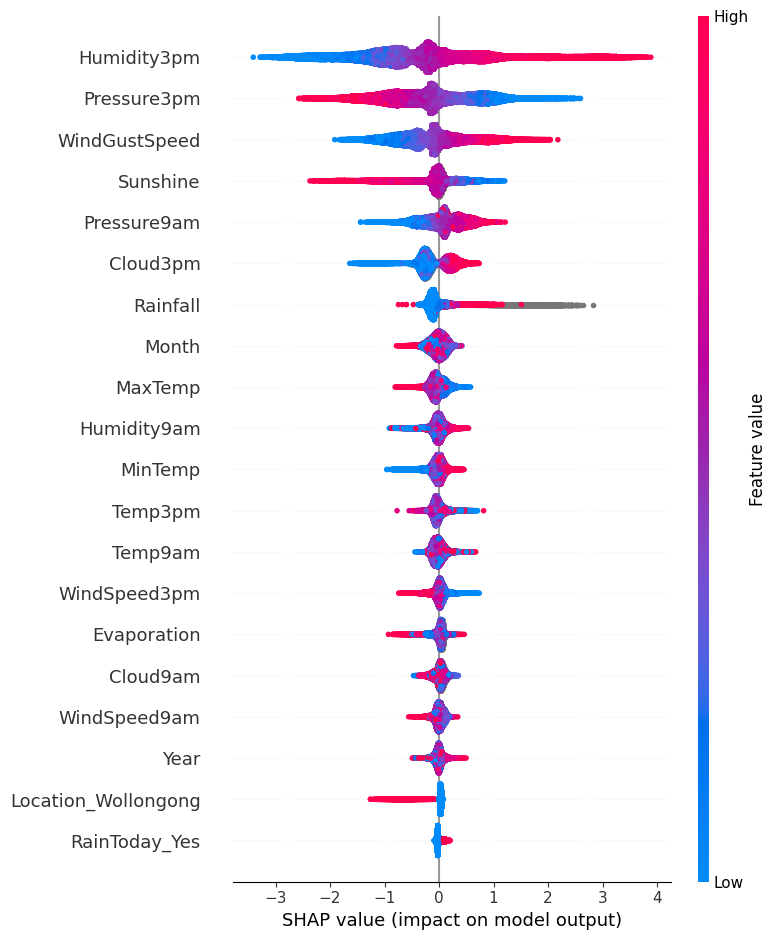

In [25]:
explainer = shap.Explainer(xgb_best)
shap_values = explainer(x_train)
shap.summary_plot(shap_values, x_train)


Explicación del grafico:
- **Eje Y**: Lista las caracteristicas del modelo, ordenadas de mayor a menor importancia.
- **Eje X**: Muestra el valor SHAP para cada caracteristica.
  -  A valores positivos: La caracteristica empuja a la predicción del modelo a decir *Yes*, en nuestro caso a predecir que mañana llovera.
  -  A valores negativos: La caracteristica empuja a la predicción del modelo a decir *No*, en nuestro caso a predecir que mañana  NO llovera.
- **Puntos**: Cada punto representa una instancia del dataset.
- **Color de los puntos**: Representa el valor de la característica en esa instancia.
  - El color gris, representa los valores NaN.

Como se puede observar en el gráfico las variables `Humidity3pm`, `Pressure3pm` y `WindGustSpeed` son las que más nos aportan al momento de predecir si lloverá al día siguiente. Es decir, que mayor humedad a las 3pm junto con una baja presión a las 3pm  y con valores altos, en cuanto a la velocidad máxima del viento, son las caractersticas que mas influyen al modelo al momento de tomar una decisión.

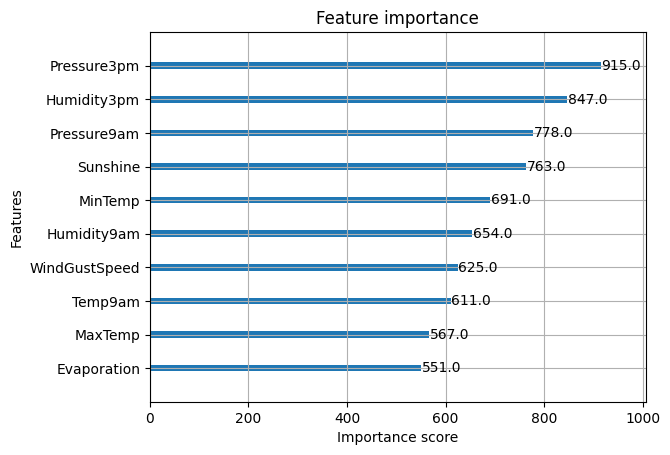

In [32]:
from xgboost import plot_importance

plot_importance(xgb_best, max_num_features=10)
plt.show()

### Guardamos el modelo

In [57]:
joblib.dump(xgb_best, 'xgb_best.joblib')

['xgb_best.joblib']